# Data preprocessing

Import the libraries

In [1]:
import numpy as np
import pandas as pd

Import the data

In [2]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\2954675577.py:1: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')


In [3]:
loan_data = loan_data_backup.copy()

Explore the data

In [4]:
pd.options.display.max_columns = None

In [5]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade       emp_title emp_length  \
0     13.56        84.92     C        C1            Chef  10+ years   
1     18.94       777.23     D        D2     Postmaster   10+ years   
2     17.97       180.69     D        D1  Administrative    6 years   
3     18.94       146.51     D        D2   IT Supervisor  10+ years   
4     16.14       731.78     C        C4        Mechanic  10+ years   

  home_ownership  annual_inc verification_status   issue_d loan_status  \
0           RENT     55000.0        Not Verified  Dec-2018     Current   
1       MORTGAGE     90000.0     Source Verified  Dec-2018     Current   
2       MORTGAGE     59280.0     Source Verified  Dec-2018     Current   
3       MORTGAGE     92000.0     Source Verified  Dec-2018     Current   
4       MORTGAGE     57250.0        Not Verified  Dec-2018     Current   

  pymnt_plan  url desc             purpose               title zip_code  \
0          n  NaN  NaN  debt_consolidation  Debt consolidation    109xx   
1          n  NaN  NaN  debt_consolidation  Debt consolidation    713xx   
2          n  NaN  NaN  debt_consolidation  Debt consolidation    490xx   
3          n  NaN  NaN  debt_consolidation  Debt consolidation    985xx   
4          n  NaN  NaN  debt_consolidation  Debt consolidation    212xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         NY  18.24          0.0         Apr-2001             1.0   
1         LA  26.52          0.0         Jun-1987             0.0   
2         MI  10.51          0.0         Apr-2011             0.0   
3         WA  16.74          0.0         Feb-2006             0.0   
4         MD  26.35          0.0         Dec-2000             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                    45.0       9.0      1.0   
1                    71.0                    75.0      13.0      1.0   
2                     NaN                     NaN       8.0      0.0   
3                     NaN                     NaN      10.0      0.0   
4                     NaN                     NaN      12.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0       4341        10.3       34.0                   w    2386.02   
1      12315        24.2       44.0                   w   29387.75   
2       4599        19.1       13.0                   w    4787.21   
3       5468        78.1       13.0                   w    3831.93   
4        829         3.6       26.0                   w   29339.02   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        2386.02       167.02           167.02           113.98   
1       29387.75      1507.11          1507.11           612.25   
2        4787.21       353.89           353.89           212.79   
3        3831.93       286.71           286.71           168.07   
4       29339.02      1423.21          1423.21           660.98   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0          53.04                 0.0         0.0                      0.0   
1         894.86                 0.0         0.0                      0.0   
2         141.10                 0.0         0.0                      0.0   
3         118.64                 0.0         0.0                      0.0   
4         762.23                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Feb-2019            84.92     Mar

In [6]:
loan_data.shape

(2260668, 145)

In [7]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [8]:
loan_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 145 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          0 non-null        float64
 1    member_id                                   0 non-null        float64
 2    loan_amnt                                   2260668 non-null  int64  
 3    funded_amnt                                 2260668 non-null  int64  
 4    funded_amnt_inv                             2260668 non-null  float64
 5    term                                        2260668 non-null  object 
 6    int_rate                                    2260668 non-null  float64
 7    installment                                 2260668 non-null  float64
 8    grade                                       2260668 non-null  object 
 9    sub_grade                                   

# General Preprocessing 

Preprocessing countinous variables

Time related furures

In [9]:
loan_data['emp_length'].unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [10]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('nan', str(0))

In [11]:
loan_data['emp_length_int'].unique()

array(['10', '6', '4', '0', '2', '9', nan, '5', '3', '7', '1', '8'],
      dtype=object)

In [12]:
type(loan_data['emp_length_int'][0])

str

In [13]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [14]:
loan_data['emp_length_int'].unique()

array([10.,  6.,  4.,  0.,  2.,  9., nan,  5.,  3.,  7.,  1.,  8.])

In [15]:
type(loan_data['emp_length_int'].unique()[6])

numpy.float64

In [16]:
loan_data['earliest_cr_line'].head()

0    Apr-2001
1    Jun-1987
2    Apr-2011
3    Feb-2006
4    Dec-2000
Name: earliest_cr_line, dtype: object

In [17]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'])

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\3502084455.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'])


In [18]:
loan_data['earliest_cr_line_date']

0         2001-04-01
1         1987-06-01
2         2011-04-01
3         2006-02-01
4         2000-12-01
             ...    
2260663   2004-01-01
2260664   2003-03-01
2260665   1995-02-01
2260666   2003-07-01
2260667   2014-04-01
Name: earliest_cr_line_date, Length: 2260668, dtype: datetime64[ns]

In [19]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0          6088 days
1         11141 days
2          2436 days
3          4321 days
4          6209 days
             ...    
2260663    5083 days
2260664    5389 days
2260665    8339 days
2260666    5267 days
2260667    1340 days
Name: earliest_cr_line_date, Length: 2260668, dtype: timedelta64[ns]

In [20]:
(pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / pd.to_timedelta('30d') # / np.timedelta64(1, 'M'),  pd.to_timedelta('1M')<-- Not good

0          202.933333
1          371.366667
2           81.200000
3          144.033333
4          206.966667
              ...    
2260663    169.433333
2260664    179.633333
2260665    277.966667
2260666    175.566667
2260667     44.666667
Name: earliest_cr_line_date, Length: 2260668, dtype: float64

In [21]:
# Will take a reference day: 2017-12-01
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / pd.to_timedelta('30d')))

In [22]:
pd.set_option('float_format', '{:.2f}'.format)

In [23]:
loan_data['mths_since_earliest_cr_line'].head()

0   203.00
1   371.00
2    81.00
3   144.00
4   207.00
Name: mths_since_earliest_cr_line, dtype: float64

In [24]:
loan_data['mths_since_earliest_cr_line'].describe()

count   2260639.00
mean        218.84
std          95.54
min          25.00
25%         153.00
50%         203.00
75%         269.00
max        1032.00
Name: mths_since_earliest_cr_line, dtype: float64

In [25]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [26]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
loan_data['term_int'] = loan_data['term_int'].str.replace(' ', '')

In [27]:
loan_data['term_int'].unique()

array(['36', '60'], dtype=object)

In [28]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [29]:
loan_data['term_int'].unique()

array([36, 60], dtype=int64)

In [30]:
loan_data['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [31]:
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'])

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\3672562545.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'])


In [32]:
loan_data['issue_date'].head()

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_date, dtype: datetime64[ns]

In [33]:
# Will take a reference day: 2021-12-01
loan_data['mths_since_issue_date'] = round(pd.to_numeric((pd.to_datetime('2021-12-01') - loan_data['issue_date']) / pd.to_timedelta('30d')))

In [34]:
loan_data['mths_since_issue_date'].describe()

count   2260668.00
mean         68.02
std          21.76
min          37.00
25%          50.00
50%          66.00
75%          81.00
max         177.00
Name: mths_since_issue_date, dtype: float64

Check for missing values

In [35]:
pd.options.display.max_rows = None

In [36]:
loan_data.isnull().sum()

id                                            2260668
member_id                                     2260668
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      166969
emp_length                                     146907
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

In [37]:
loan_data[['total_rev_hi_lim', 'annual_inc', 'acc_now_delinq', 'total_acc', 'pub_rec', 'open_acc', 'mths_since_earliest_cr_line', 'inq_last_6mths', 'delinq_2yrs', 'emp_length_int']].isnull().sum()

total_rev_hi_lim                70276
annual_inc                          4
acc_now_delinq                     29
total_acc                          29
pub_rec                            29
open_acc                           29
mths_since_earliest_cr_line        29
inq_last_6mths                     30
delinq_2yrs                        29
emp_length_int                 146907
dtype: int64

In [38]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

In [39]:
loan_data[['total_rev_hi_lim', 'annual_inc', 'acc_now_delinq', 'total_acc', 'pub_rec', 'open_acc', 'mths_since_earliest_cr_line', 'inq_last_6mths', 'delinq_2yrs', 'emp_length_int']].isnull().sum()

total_rev_hi_lim               0
annual_inc                     0
acc_now_delinq                 0
total_acc                      0
pub_rec                        0
open_acc                       0
mths_since_earliest_cr_line    0
inq_last_6mths                 0
delinq_2yrs                    0
emp_length_int                 0
dtype: int64

# Data preparation for PD model

Dependent Variable. Good/Bad (Default) Definition. Default and Non-default Accounts.

In [40]:
loan_data['loan_status'].value_counts()

loan_status
Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: count, dtype: int64

In [41]:
pd.set_option('float_format', '{:.6f}'.format)

In [42]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

loan_status
Fully Paid                                            0.460904
Current                                               0.406824
Charged Off                                           0.115742
Late (31-120 days)                                    0.009686
In Grace Period                                       0.003960
Late (16-30 days)                                     0.001653
Does not meet the credit policy. Status:Fully Paid    0.000879
Does not meet the credit policy. Status:Charged Off   0.000337
Default                                               0.000014
Name: count, dtype: float64

In [43]:
default_loans = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']

loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(default_loans), 0, 1)

In [44]:
loan_data['good_bad'].value_counts()

good_bad
1    1976324
0     284344
Name: count, dtype: int64

# Split the data

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis=1), 
                                                                                                                 loan_data['good_bad'], 
                                                                                                                 test_size = 0.2, 
                                                                                                                 random_state = 42)

In [47]:
loan_data.shape

(2260668, 152)

In [48]:
loan_data_inputs_train.shape, loan_data_targets_train.shape, loan_data_inputs_test.shape, loan_data_targets_test.shape

((1808534, 151), (1808534,), (452134, 151), (452134,))

Data preparation

In [242]:
# >>> Train data <<<
df_inputs_prepr = loan_data_inputs_train.copy()
df_targets_prepr = loan_data_targets_train.copy()
# >>> Test data <<<
# df_inputs_prepr = loan_data_inputs_test.copy()
# df_targets_prepr = loan_data_targets_test.copy()

In [243]:
df_inputs_prepr['grade'].value_counts()

grade
B    132475
C    130169
A     86522
D     64814
E     27506
F      8171
G      2477
Name: count, dtype: int64

In [244]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis=1)

In [245]:
df1.head()

grade  good_bad
1758049     B         1
686533      B         1
900721      A         1
1727912     E         1
539691      A         1

In [246]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A     86522
1     B    132475
2     C    130169
3     D     64814
4     E     27506
5     F      8171
6     G      2477

In [247]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.964726
1     B  0.915222
2     C  0.860366
3     D  0.798331
4     E  0.722206
5     F  0.642271
6     G  0.607994

In [248]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()],
                 axis=1)

In [249]:
df1

grade  good_bad grade  good_bad
0     A     86522     A  0.964726
1     B    132475     B  0.915222
2     C    130169     C  0.860366
3     D     64814     D  0.798331
4     E     27506     E  0.722206
5     F      8171     F  0.642271
6     G      2477     G  0.607994

In [250]:
df1 = df1.iloc[ : , [0, 1, 3]]

In [251]:
df1

grade  good_bad  good_bad
0     A     86522  0.964726
1     B    132475  0.915222
2     C    130169  0.860366
3     D     64814  0.798331
4     E     27506  0.722206
5     F      8171  0.642271
6     G      2477  0.607994

In [252]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [253]:
df1

grade   n_obs  prop_good  prop_n_obs
0     A   86522   0.964726    0.191364
1     B  132475   0.915222    0.292999
2     C  130169   0.860366    0.287899
3     D   64814   0.798331    0.143351
4     E   27506   0.722206    0.060836
5     F    8171   0.642271    0.018072
6     G    2477   0.607994    0.005478

In [254]:
# Number of good and bad borrowers for each grade 
df1['n_good'] = df1['n_obs'] * df1['prop_good']
df1['n_bad'] = df1['n_obs'] * (1 - df1['prop_good'])

# Proportion of good and bad borrowers for each grade 
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()

In [255]:
df1

grade   n_obs  prop_good  prop_n_obs        n_good        n_bad  \
0     A   86522   0.964726    0.191364  83470.000000  3052.000000   
1     B  132475   0.915222    0.292999 121244.000000 11231.000000   
2     C  130169   0.860366    0.287899 111993.000000 18176.000000   
3     D   64814   0.798331    0.143351  51743.000000 13071.000000   
4     E   27506   0.722206    0.060836  19865.000000  7641.000000   
5     F    8171   0.642271    0.018072   5248.000000  2923.000000   
6     G    2477   0.607994    0.005478   1506.000000   971.000000   

   prop_n_good  prop_n_bad  
0     0.211280    0.053483  
1     0.306893    0.196811  
2     0.283477    0.318514  
3     0.130972    0.229055  
4     0.050282    0.133900  
5     0.013284    0.051222  
6     0.003812    0.017016

WoE

In [256]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop=True)


In [257]:
df1

grade   n_obs  prop_good  prop_n_obs        n_good        n_bad  \
0     G    2477   0.607994    0.005478   1506.000000   971.000000   
1     F    8171   0.642271    0.018072   5248.000000  2923.000000   
2     E   27506   0.722206    0.060836  19865.000000  7641.000000   
3     D   64814   0.798331    0.143351  51743.000000 13071.000000   
4     C  130169   0.860366    0.287899 111993.000000 18176.000000   
5     B  132475   0.915222    0.292999 121244.000000 11231.000000   
6     A   86522   0.964726    0.191364  83470.000000  3052.000000   

   prop_n_good  prop_n_bad       WoE  
0     0.003812    0.017016 -1.495984  
1     0.013284    0.051222 -1.349633  
2     0.050282    0.133900 -0.979439  
3     0.130972    0.229055 -0.558976  
4     0.283477    0.318514 -0.116535  
5     0.306893    0.196811  0.444258  
6     0.211280    0.053483  1.373821

In [258]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs() # It is show how much WoE increase to one class to the next 

# IV = Information Value
df1['IV'] = ((df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']).sum()

In [259]:
df1

grade   n_obs  prop_good  prop_n_obs        n_good        n_bad  \
0     G    2477   0.607994    0.005478   1506.000000   971.000000   
1     F    8171   0.642271    0.018072   5248.000000  2923.000000   
2     E   27506   0.722206    0.060836  19865.000000  7641.000000   
3     D   64814   0.798331    0.143351  51743.000000 13071.000000   
4     C  130169   0.860366    0.287899 111993.000000 18176.000000   
5     B  132475   0.915222    0.292999 121244.000000 11231.000000   
6     A   86522   0.964726    0.191364  83470.000000  3052.000000   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0     0.003812    0.017016 -1.495984             NaN       NaN 0.477452  
1     0.013284    0.051222 -1.349633        0.034278  0.146351 0.477452  
2     0.050282    0.133900 -0.979439        0.079935  0.370194 0.477452  
3     0.130972    0.229055 -0.558976        0.076125  0.420462 0.477452  
4     0.283477    0.318514 -0.116535        0.062036  0.442441 0.477452  
5     0.306893    0.196811  0.444258        0.054856  0.560793 0.477452  
6     0.211280    0.053483  1.373821        0.049504  0.929563 0.477452

Preprocessing Discrete Variables: Automating Calculations

In [260]:
def woe_discrete(df, discrete_vatiable_name, good_bad_vatriable_df):
    df = pd.concat([df[discrete_vatiable_name], good_bad_vatriable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
                    axis=1)
    df = df.iloc[ :, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    # The proportion of observations that fals in each subcategory
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['n_obs'] * df['prop_good']
    df['n_bad'] = df['n_obs'] * (1 - df['prop_good'])
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = ((df['prop_n_good'] - df['prop_n_bad']) * df['WoE']).sum()

    return df

def st(df_styled):
    return df_styled.style.bar(subset=['prop_n_obs', 'WoE'], color=['red', 'green'], vmax=1)


In [261]:
def plot_by_woe(df_WoE, rotation_of_x_axis_label = 0):

    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    z = df_WoE['prop_n_obs']

    plt.style.use('dark_background')

    plt.figure(figsize = (18, 6))
    plt.grid(color = 'w', linestyle = '--', linewidth = 0.5)
    plt.axhline(y=0, color='c', linewidth=2)
    plt.bar(x, z*10, color='lightgreen', alpha=0.5)
    plt.plot(x, y, marker = 'o', color = 'w', linestyle = '--')

    plt.title(f'Weight of Evidence by {df_WoE.columns[0]}')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')

    plt.xticks(rotation = rotation_of_x_axis_label)

In [262]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)

V: grade

In [263]:
st(df_temp)

Preprocessing Discrete Variables: Results Visualization 

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='ticks', context='talk')

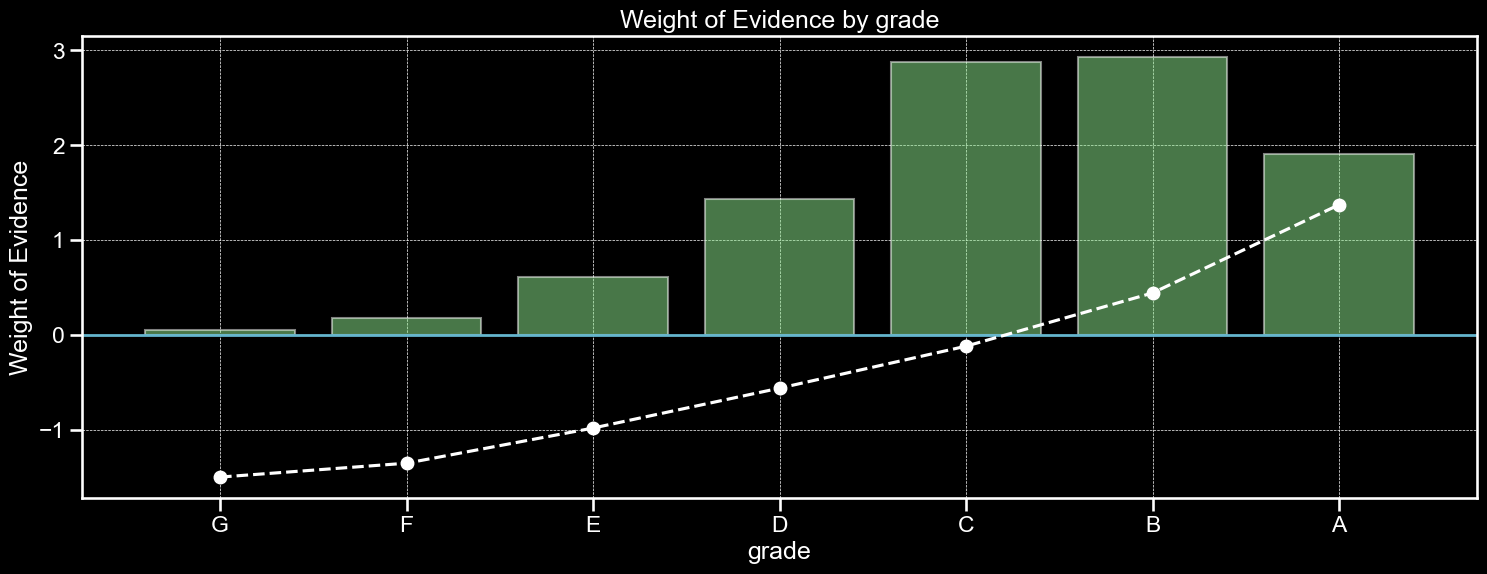

In [265]:
plot_by_woe(df_temp)

In [266]:
row__dummies = [pd.get_dummies(df_inputs_prepr['grade'], prefix='grade', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['sub_grade'], prefix='sub_grade', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['home_ownership'], prefix='home_ownership', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['verification_status'], prefix='verification_status', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['loan_status'], prefix='loan_status', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['purpose'], prefix='purpose', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['addr_state'], prefix='addr_state', prefix_sep=':', dtype='int'),
            pd.get_dummies(df_inputs_prepr['initial_list_status'], prefix='initial_list_status', prefix_sep=':', dtype='int')]

In [267]:
# Storing the dummies variables for the PD model
loan_data_row_dummies = pd.concat(row__dummies, axis=1)

In [268]:
loan_data_row_dummies.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
1758049        0        1        0        0        0        0        0   
686533         0        1        0        0        0        0        0   
900721         1        0        0        0        0        0        0   
1727912        0        0        0        0        1        0        0   
539691         1        0        0        0        0        0        0   

         sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
1758049             0             0             0             0             0   
686533              0             0             0             0             0   
900721              0             0             0             1             0   
1727912             0             0             0             0             0   
539691              0             0             0             0             1   

         sub_grade:B1  sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  \
1758049             0             0             1             0             0   
686533              0             0             0             1             0   
900721              0             0             0             0             0   
1727912             0             0             0             0             0   
539691              0             0             0             0             0   

         sub_grade:C1  sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  \
1758049             0             0             0             0             0   
686533              0             0             0             0             0   
900721              0             0             0             0             0   
1727912             0             0             0             0             0   
539691              0             0             0             0             0   

         sub_grade:D1  sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  \
1758049             0             0             0             0             0   
686533              0             0             0             0             0   
900721              0             0             0             0             0   
1727912             0             0             0             0             0   
539691              0             0             0             0             0   

         sub_grade:E1  sub_grade:E2  sub_grade:E3  sub_grade:E4  sub_grade:E5  \
1758049             0             0             0             0             0   
686533              0             0             0             0             0   
900721              0             0             0             0             0   
1727912             0             1             0             0             0   
539691              0             0             0             0             0   

         sub_grade:F1  sub_grade:F2  sub_grade:F3  sub_grade:F4  sub_grade:F5  \
1758049             0             0             0             0             0   
686533              0             0             0             0             0   
900721              0             0             0             0             0   
1727912             0             0             0             0             0   
539691              0             0             0             0             0   

         sub_grade:G1  sub_grade:G2  sub_grade:G3  sub_grade:G4  sub_grade:G5  \
1758049             0             0             0             0             0   
686533              0             0             0             0             0   
900721              0             0             0             0             0   
1727912             0             0             0             0             0   
539691              0             0             0             0             0   

         home_ownership:ANY  home_ownership:MORTGAGE  home_ownership:NONE  \
1758049                   0                        0                    0   
6

In [269]:
dummies = pd.get_dummies(df_inputs_prepr['grade'], prefix='grade', prefix_sep=':', dtype='int')

In [270]:
# Reference dummy variable
ref_categorie = ['grade:G']

In [271]:
dummies.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
1758049        0        1        0        0        0        0        0
686533         0        1        0        0        0        0        0
900721         1        0        0        0        0        0        0
1727912        0        0        0        0        1        0        0
539691         1        0        0        0        0        0        0

V: home_ownership

In [272]:
df_inputs_prepr['home_ownership'].value_counts()

home_ownership
MORTGAGE    222246
RENT        179168
OWN          50497
ANY            172
OTHER           40
NONE            11
Name: count, dtype: int64

In [273]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
st(df_temp)

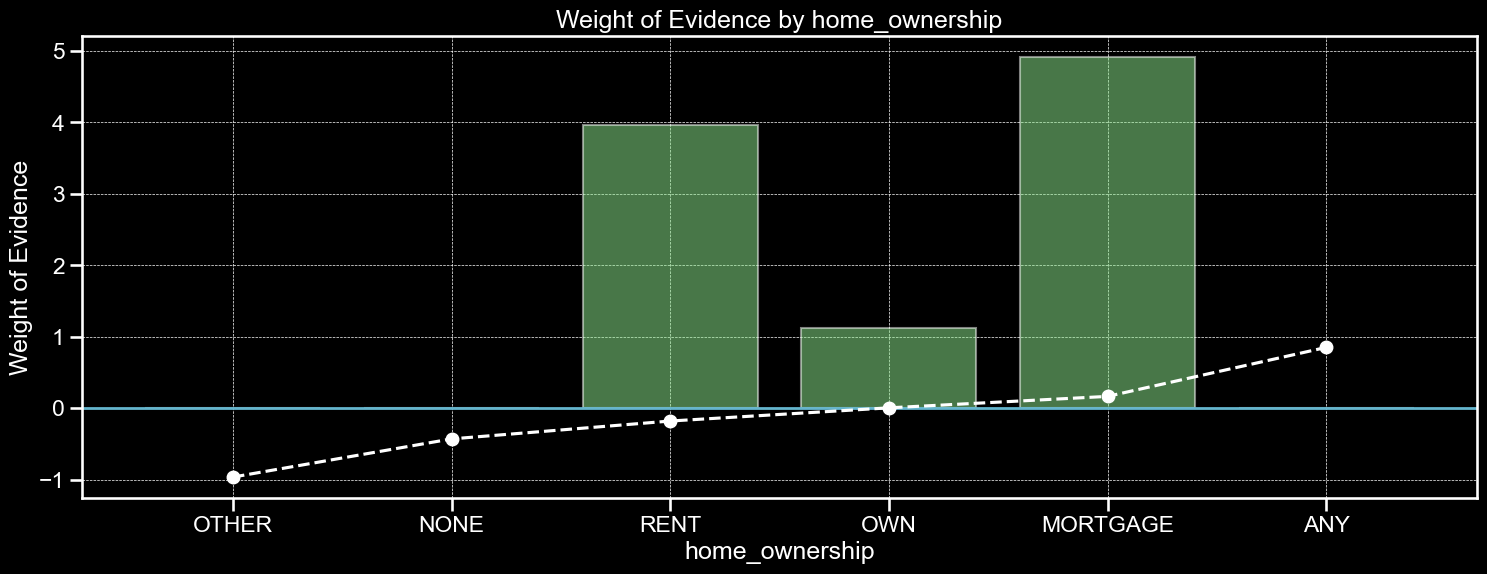

In [274]:
plot_by_woe(df_temp)

In [275]:
dummies['home_ownership:ONE_ATHER_ANY'] = sum([loan_data_row_dummies['home_ownership:NONE'],
                                               loan_data_row_dummies['home_ownership:OTHER'],
                                               loan_data_row_dummies['home_ownership:ANY']])

dummies = pd.concat([dummies, 
                     loan_data_row_dummies[['home_ownership:RENT', 'home_ownership:OWN', 'home_ownership:MORTGAGE']]], 
                     axis=1)

ref_categorie.append('home_ownership:ONE_ATHER_ANY')

In [276]:
dummies.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:ONE_ATHER_ANY', 'home_ownership:RENT',
       'home_ownership:OWN', 'home_ownership:MORTGAGE'], dtype=object)

In [277]:
dummies.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
1758049        0        1        0        0        0        0        0   
686533         0        1        0        0        0        0        0   
900721         1        0        0        0        0        0        0   
1727912        0        0        0        0        1        0        0   
539691         1        0        0        0        0        0        0   

         home_ownership:ONE_ATHER_ANY  home_ownership:RENT  \
1758049                             0                    1   
686533                              0                    1   
900721                              0                    0   
1727912                             0                    1   
539691                              0                    0   

         home_ownership:OWN  home_ownership:MORTGAGE  
1758049                   0                        0  
686533                    0                        0  
900721                    1                        0  
1727912                   0                        0  
539691                    0                        1

V: addr_state


In [278]:
df_inputs_prepr['addr_state'].unique()

array(['TX', 'MD', 'NC', 'MO', 'NJ', 'GA', 'OH', 'IL', 'CA', 'FL', 'VA',
       'CO', 'AL', 'CT', 'KS', 'WI', 'PA', 'OR', 'MT', 'NM', 'TN', 'NY',
       'MS', 'SC', 'AR', 'OK', 'UT', 'RI', 'LA', 'MI', 'MA', 'MN', 'AZ',
       'HI', 'IN', 'NV', 'VT', 'WA', 'SD', 'ME', 'KY', 'DE', 'NH', 'NE',
       'WV', 'AK', 'ND', 'DC', 'WY', 'ID', 'IA'], dtype=object)

In [279]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
st(df_temp)

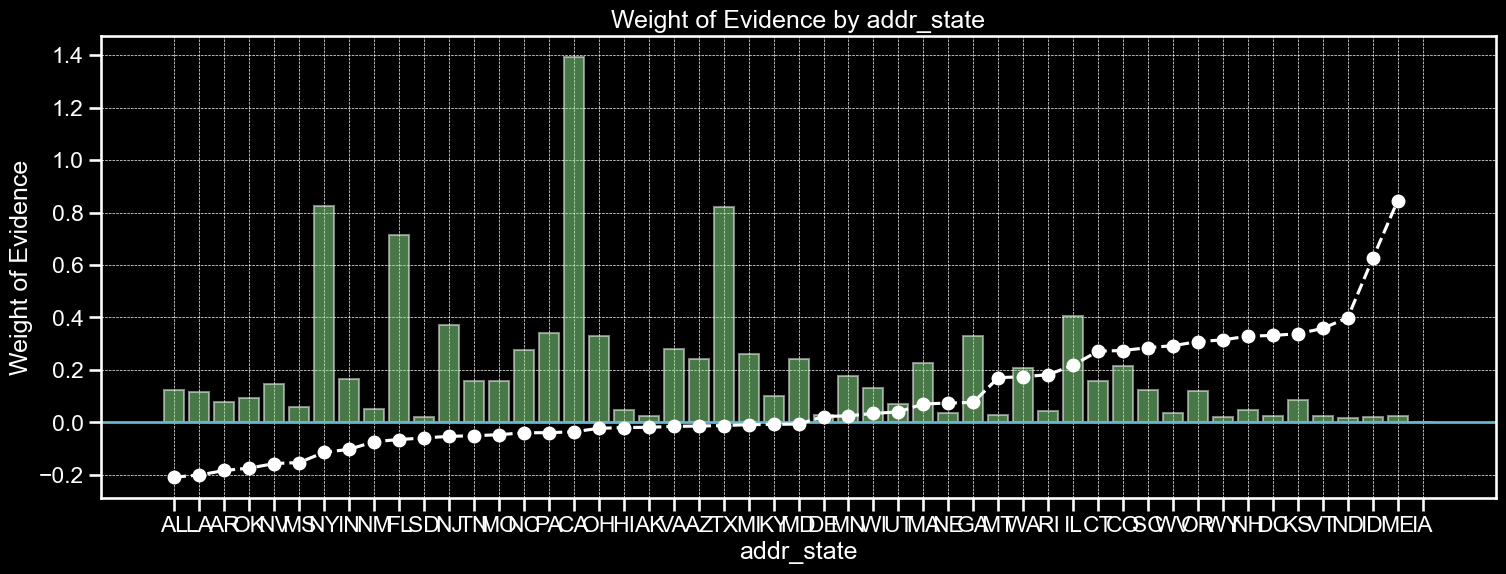

In [280]:
plot_by_woe(df_temp)

In [281]:
# AI

# VT_ME

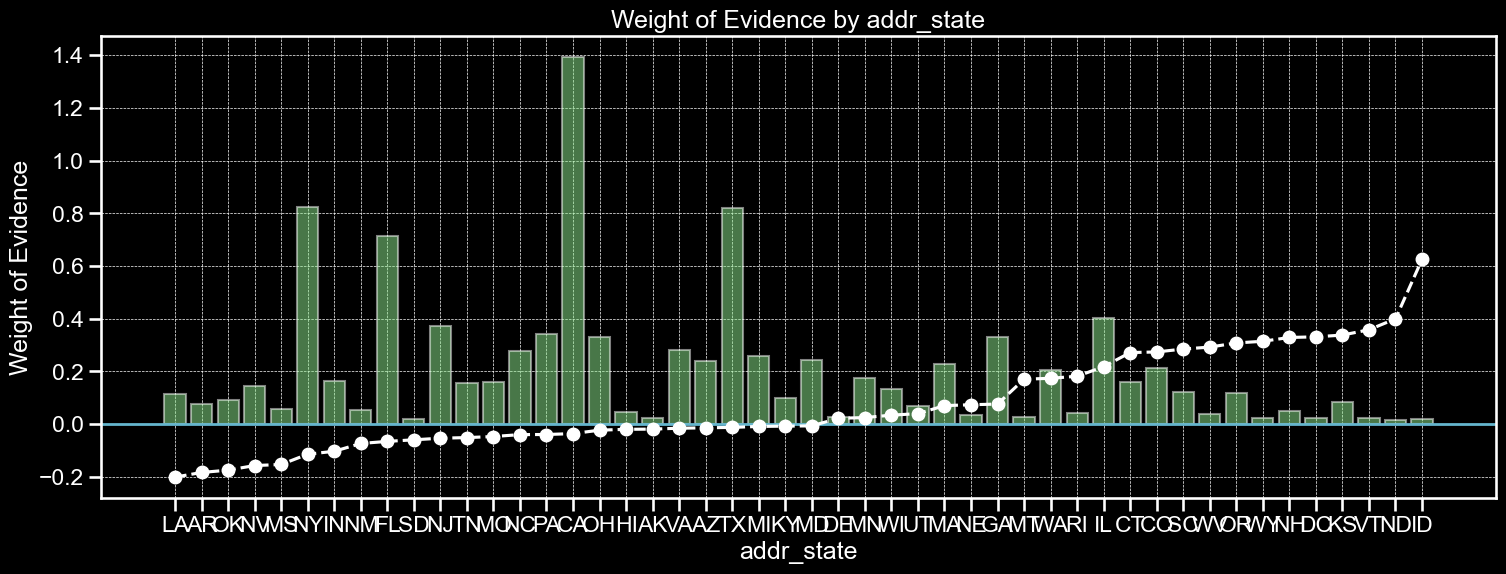

In [282]:
plot_by_woe(df_temp.iloc[1:-2, :])

In [283]:
# AI
# AL_AR_MS_OK_LA

# DC_ID
# VT_ME

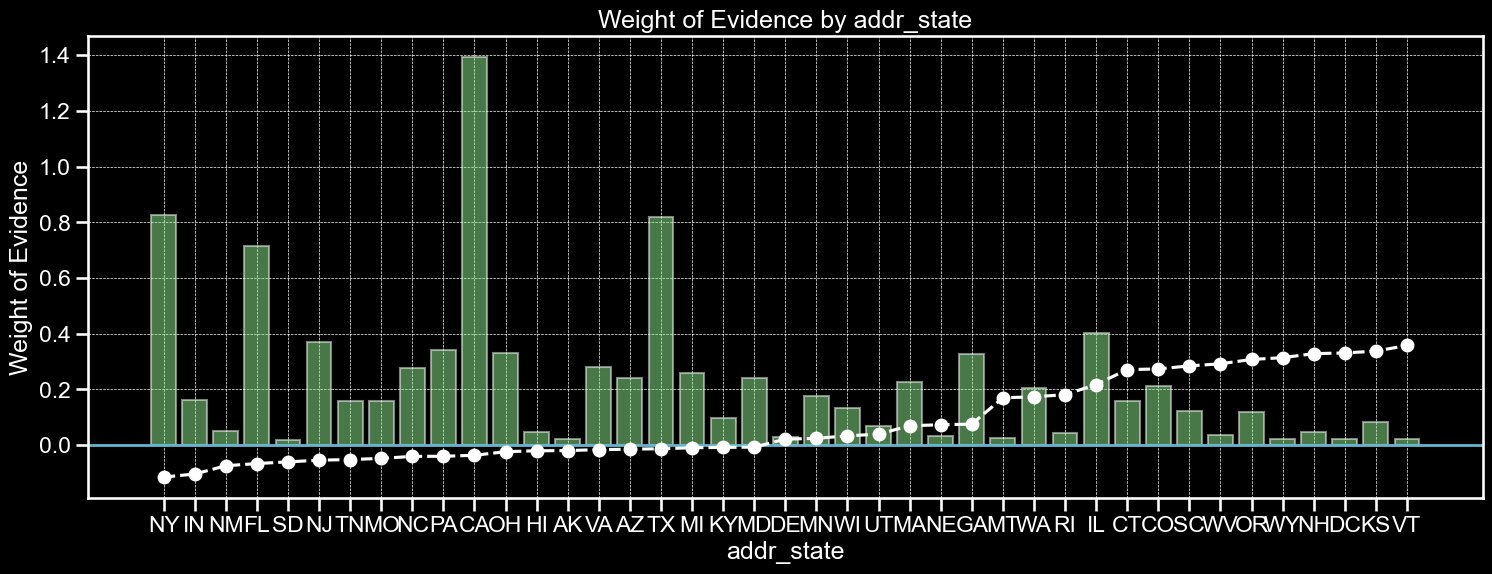

In [284]:
plot_by_woe(df_temp.iloc[6:-4, :])

In [285]:
# AI
# AL_AR_MS_OK_LA
# NV_NM_HI
# NY
# SD
# FL
# MO_MD_NC_PA_KY_TN
# CA
# NJ_MI_IN_VA_MN_AK_AZ_NE_OH
# TX
# DE_MA_UT
# WI_GA
# RI_WY_IL
# MT_KS
# CT_ND_WA_CO_SC
# WV_OR_NH
# DC_ID
# VT_ME

In [286]:
dummies['addr_state:AL_AR_MS_OK_LA'] = sum([loan_data_row_dummies['addr_state:AL'],
                                           loan_data_row_dummies['addr_state:AR'],
                                           loan_data_row_dummies['addr_state:MS'],
                                           loan_data_row_dummies['addr_state:OK'],
                                           loan_data_row_dummies['addr_state:LA']])

dummies['addr_state:NV_NM_HI'] = sum([loan_data_row_dummies['addr_state:NV'],
                                           loan_data_row_dummies['addr_state:NM'],
                                           loan_data_row_dummies['addr_state:HI']])

dummies['addr_state:MO_MD_NC_PA_KY_TN'] = sum([loan_data_row_dummies['addr_state:MO'],
                                           loan_data_row_dummies['addr_state:MD'],
                                           loan_data_row_dummies['addr_state:NC'],
                                           loan_data_row_dummies['addr_state:PA'],
                                           loan_data_row_dummies['addr_state:KY'],
                                           loan_data_row_dummies['addr_state:TN']])

dummies['addr_state:NJ_MI_IN_VA_MN_AK_AZ_NE_OH'] = sum([loan_data_row_dummies['addr_state:NJ'],
                                           loan_data_row_dummies['addr_state:MI'],
                                           loan_data_row_dummies['addr_state:IN'],
                                           loan_data_row_dummies['addr_state:VA'],
                                           loan_data_row_dummies['addr_state:MN'],
                                           loan_data_row_dummies['addr_state:AK'],
                                           loan_data_row_dummies['addr_state:AZ'],
                                           loan_data_row_dummies['addr_state:NE'],
                                           loan_data_row_dummies['addr_state:OH']])

dummies['addr_state:DE_MA_UT'] = sum([loan_data_row_dummies['addr_state:DE'],
                                    loan_data_row_dummies['addr_state:MA'],
                                    loan_data_row_dummies['addr_state:UT']])

dummies['addr_state:WI_GA'] = sum([loan_data_row_dummies['addr_state:WI'],
                                    loan_data_row_dummies['addr_state:GA']])

dummies['addr_state:RI_WY_IL'] = sum([loan_data_row_dummies['addr_state:RI'],
                                    loan_data_row_dummies['addr_state:WY'],
                                    loan_data_row_dummies['addr_state:IL']])

dummies['addr_state:MT_KS'] = sum([loan_data_row_dummies['addr_state:MT'],
                                    loan_data_row_dummies['addr_state:KS']])

dummies['addr_state:CT_ND_WA_CO_SC'] = sum([loan_data_row_dummies['addr_state:CT'],
                                           loan_data_row_dummies['addr_state:ND'],
                                           loan_data_row_dummies['addr_state:WA'],
                                           loan_data_row_dummies['addr_state:CO'],
                                           loan_data_row_dummies['addr_state:SC']])

dummies['addr_state:WV_OR_NH'] = sum([loan_data_row_dummies['addr_state:WV'],
                                    loan_data_row_dummies['addr_state:OR'],
                                    loan_data_row_dummies['addr_state:NH']])

dummies['addr_state:DC_ID'] = sum([loan_data_row_dummies['addr_state:DC'],
                                    loan_data_row_dummies['addr_state:ID']])

dummies['addr_state:VT_ME'] = sum([loan_data_row_dummies['addr_state:VT'],
                                    loan_data_row_dummies['addr_state:ME']])

dummies = pd.concat([dummies, 
                     loan_data_row_dummies[['addr_state:IA',
                                            'addr_state:NY',
                                            'addr_state:SD',
                                            'addr_state:FL',
                                            'addr_state:CA',
                                            'addr_state:TX']]], 
                     axis=1)

ref_categorie.append('addr_state:IA')

V: verification_status

In [287]:
df_inputs_prepr['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [288]:
df_inputs_prepr['verification_status'].notnull().value_counts()

verification_status
True    452134
Name: count, dtype: int64

In [289]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
st(df_temp)

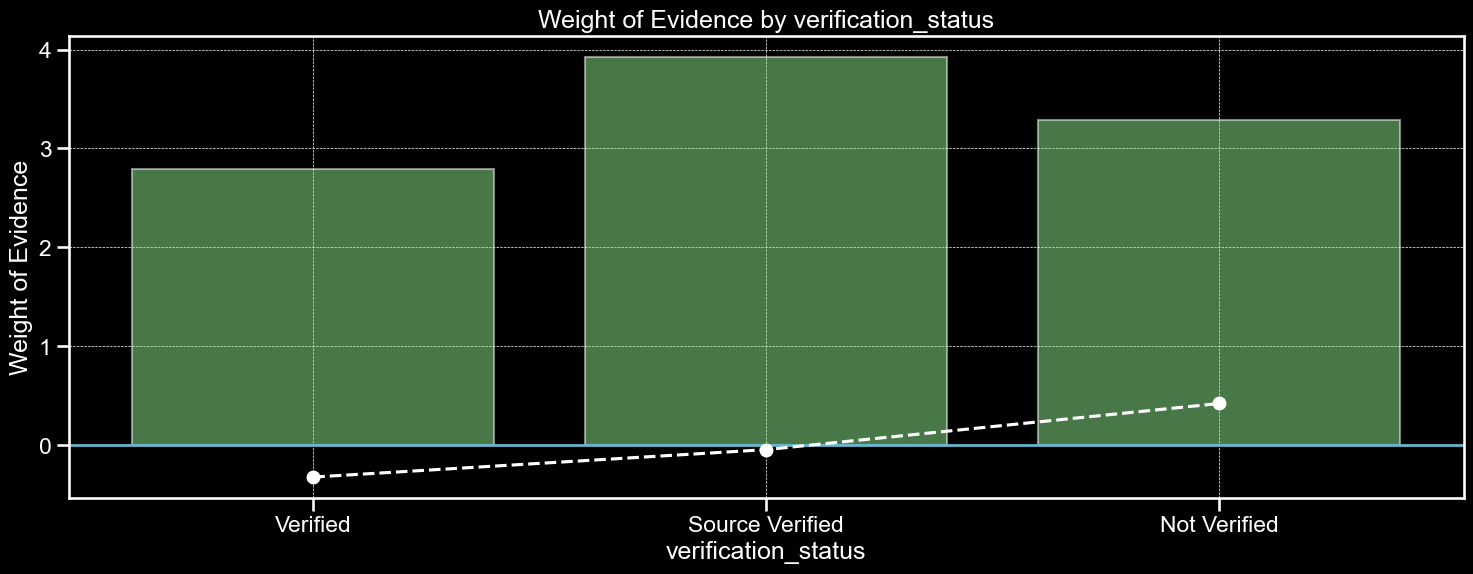

In [290]:
plot_by_woe(df_temp)

In [291]:
dummies = pd.concat([dummies, pd.get_dummies(df_inputs_prepr['verification_status'], 
                          prefix='verification_status', 
                          prefix_sep=':', 
                          dtype='int')], axis=1)

ref_categorie.append('verification_status:Verified')

V: purpose

In [292]:
df_inputs_prepr['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'small_business', 'other',
       'major_purchase', 'home_improvement', 'car', 'house', 'vacation',
       'moving', 'medical', 'renewable_energy', 'wedding', 'educational'],
      dtype=object)

In [293]:
df_inputs_prepr['purpose'].notnull().value_counts()

purpose
True    452134
Name: count, dtype: int64

In [294]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
st(df_temp)

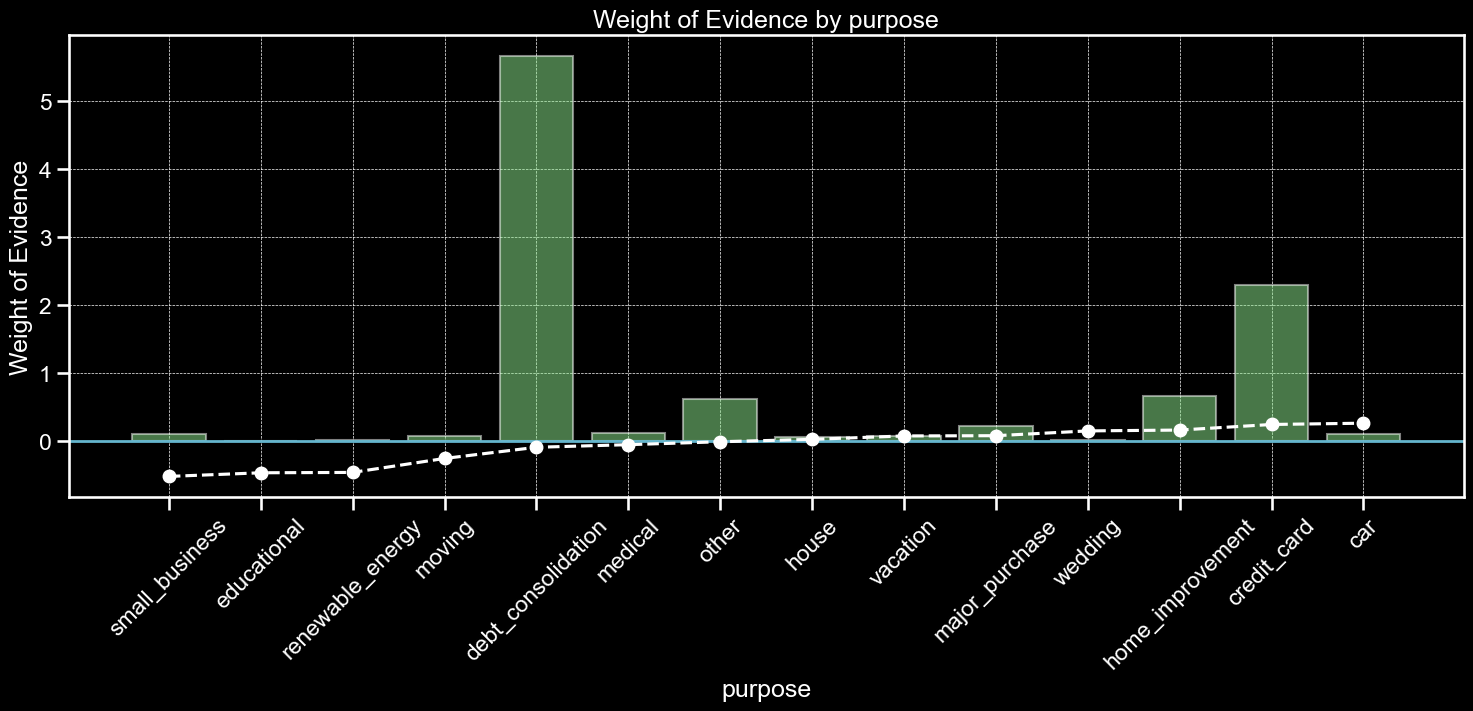

In [295]:
plot_by_woe(df_temp, 45)

In [296]:
dummies['purpose:educational__small_business__renewable_energy__moving'] = sum([loan_data_row_dummies['purpose:educational'],
                                                                               loan_data_row_dummies['purpose:renewable_energy'], 
                                                                               loan_data_row_dummies['purpose:small_business'],
                                                                               loan_data_row_dummies['purpose:moving']])

dummies = pd.concat([dummies, 
                     loan_data_row_dummies['purpose:debt_consolidation']], 
                     axis=1)

dummies['purpose:medical_wedding_other_house_vacation_major_purchase'] = sum([loan_data_row_dummies['purpose:wedding'],
                                                                              loan_data_row_dummies['purpose:other'],
                                                                              loan_data_row_dummies['purpose:house'], 
                                                                              loan_data_row_dummies['purpose:vacation'],
                                                                              loan_data_row_dummies['purpose:major_purchase']])

dummies = pd.concat([dummies,
                     loan_data_row_dummies[['purpose:home_improvement', 'purpose:credit_card', 'purpose:car']]],
                    axis=1)

ref_categorie.append('purpose:educational__small_business__renewable_energy__moving')


V: initial_list_status

In [297]:
df_inputs_prepr['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [298]:
df_inputs_prepr['initial_list_status'].notnull().value_counts()

initial_list_status
True    452134
Name: count, dtype: int64

In [299]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
st(df_temp)

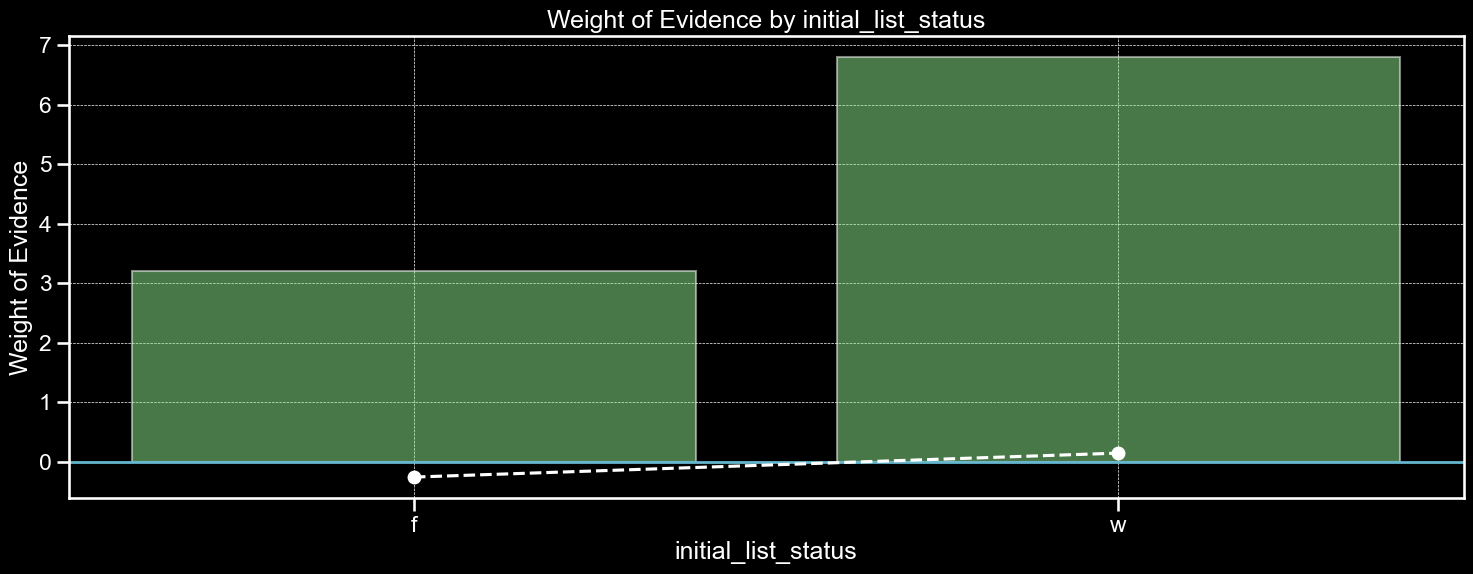

In [300]:
plot_by_woe(df_temp)

In [301]:
dummies = pd.concat([dummies,
                     pd.get_dummies(df_inputs_prepr['initial_list_status'], 
                                    prefix='initial_list_status', 
                                    prefix_sep=':', 
                                    dtype='int')],
                    axis=1)

ref_categorie.append('initial_list_status:f')

Preprocessing Countinuos Variables: Automatimg Calculations and Visualization Results

In [302]:
def woe_ordered_continuous(df, discrete_vatiable_name, good_bad_vatriable_df):
    df = pd.concat([df[discrete_vatiable_name], good_bad_vatriable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
                    axis=1)
    df = df.iloc[ :, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    # The proportion of observations that fals in each subcategory
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['n_obs'] * df['prop_good']
    df['n_bad'] = df['n_obs'] * (1 - df['prop_good'])
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # df = df.sort_values(['WoE'])
    # df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = ((df['prop_n_good'] - df['prop_n_bad']) * df['WoE']).sum()

    return df

V: term_int

In [303]:
df_inputs_prepr['term_int'].value_counts()

term_int
36    321675
60    130459
Name: count, dtype: int64

In [304]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
st(df_temp)

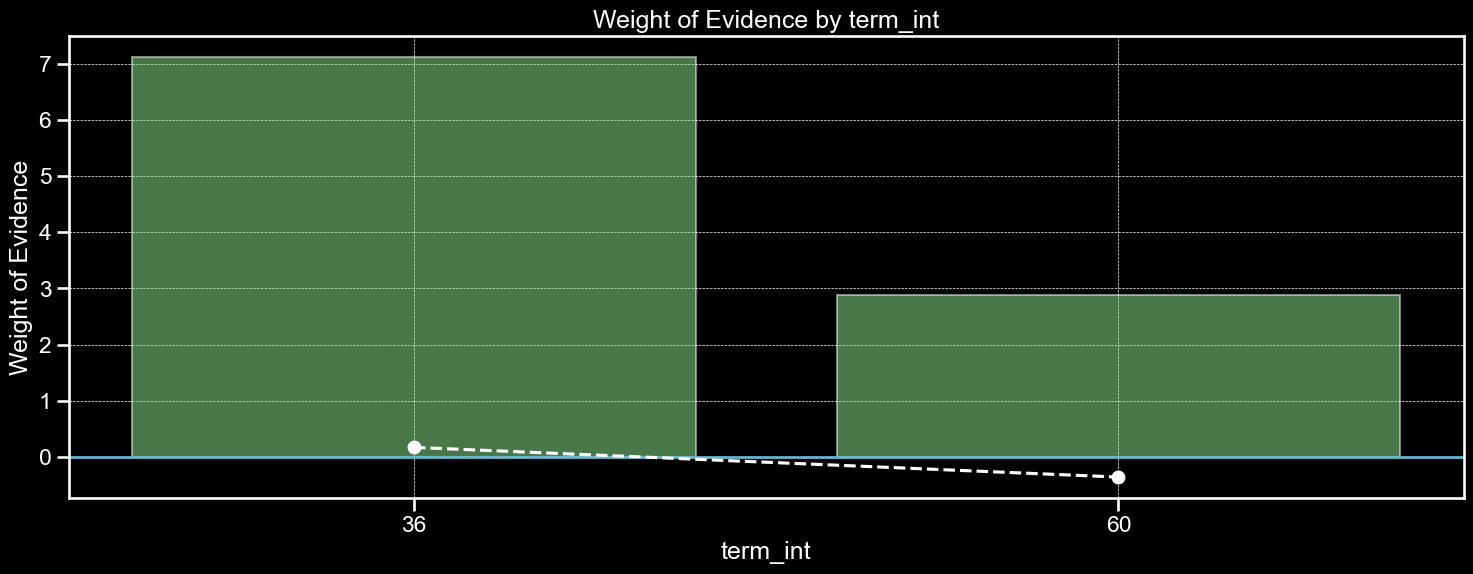

In [305]:
plot_by_woe(df_temp)

In [306]:
dummies['term_int:36'] = np.where(df_inputs_prepr['term_int'] == 36, 1, 0)
dummies['term_int:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

ref_categorie.append('term_int:60')

V: emp_length_int

In [307]:
df_inputs_prepr['emp_length_int'].unique()

array([ 0.,  2.,  5.,  3.,  1.,  9., 10.,  4.,  7.,  6.,  8.])

In [308]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
st(df_temp)

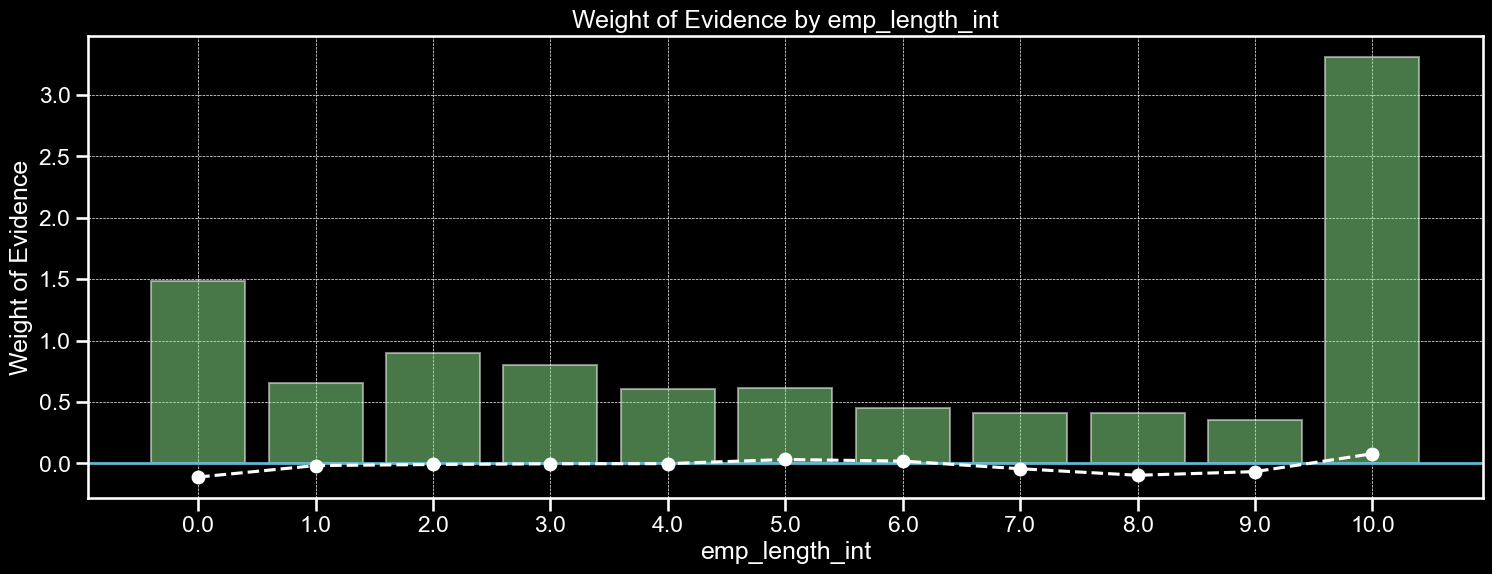

In [309]:
plot_by_woe(df_temp)

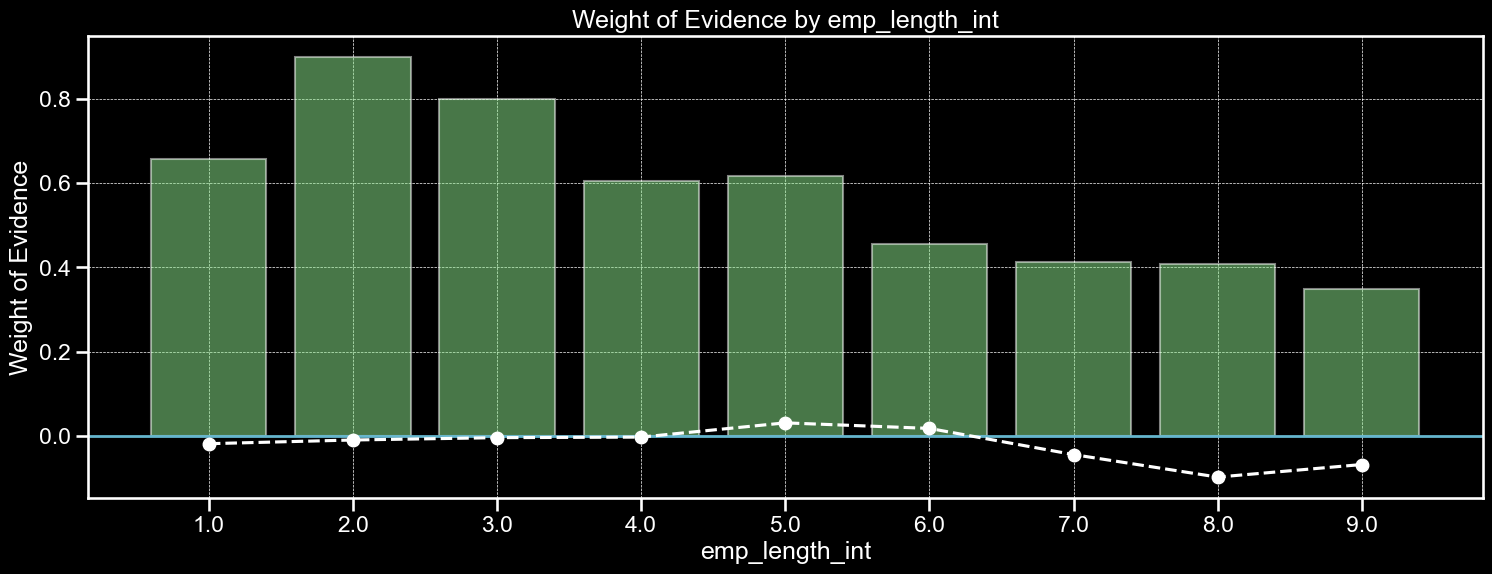

In [310]:
plot_by_woe(df_temp.iloc[1:-1, :])

In [311]:
dummies['emp_length_int:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
dummies['emp_length_int:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
dummies['emp_length_int:2-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 7)), 1, 0)
dummies['emp_length_int:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
dummies['emp_length_int:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

ref_categorie.append('emp_length_int:0')

V: mths_since_issue_date

In [312]:
df_inputs_prepr['mths_since_issue_date'].unique()

array([104.,  69.,  63., 100.,  65.,  49.,  38.,  58., 106.,  64.,  81.,
        77.,  66.,  60.,  80.,  74.,  39.,  70., 110.,  53.,  45.,  42.,
        52.,  86.,  62.,  47.,  92.,  95.,  87.,  55.,  78.,  79.,  48.,
        56.,  75.,  40.,  89.,  41.,  61.,  90.,  94.,  76.,  54.,  83.,
        73.,  71., 113.,  44.,  37.,  46.,  68., 101.,  96.,  93.,  67.,
        43.,  84.,  82.,  51.,  59., 120.,  50.,  98., 109.,  72., 107.,
        57.,  99., 131., 119.,  97.,  88., 115.,  85., 122., 102., 116.,
        91., 105., 125., 132., 108., 111., 133., 158., 171., 121., 140.,
       153., 114., 145., 123., 124., 139., 112., 128., 130., 127., 149.,
       137., 117., 135., 166., 118., 126., 154., 147., 143., 134., 152.,
       129., 136., 167., 141., 168., 157., 138., 151., 146., 172., 142.,
       144., 156., 162., 150., 169., 155., 148., 170., 175., 163., 159.,
       174., 160., 161., 164., 176., 177., 165.])

In [313]:
df_inputs_prepr['mths_since_issue_date'].describe()

count   452134.000000
mean        68.023818
std         21.750483
min         37.000000
25%         50.000000
50%         66.000000
75%         81.000000
max        177.000000
Name: mths_since_issue_date, dtype: float64

In [314]:
df_inputs_prepr['mths_since_issue_date_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_date'], 50)

In [315]:
df_inputs_prepr['mths_since_issue_date_factor'].head()

1758049    (101.4, 104.2]
686533       (67.8, 70.6]
900721       (62.2, 65.0]
1727912     (98.6, 101.4]
539691       (62.2, 65.0]
Name: mths_since_issue_date_factor, dtype: category
Categories (50, interval[float64, right]): [(36.86, 39.8] < (39.8, 42.6] < (42.6, 45.4] < (45.4, 48.2] ... (165.8, 168.6] < (168.6, 171.4] < (171.4, 174.2] < (174.2, 177.0]]

In [316]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_date_factor', df_targets_prepr)
st(df_temp)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


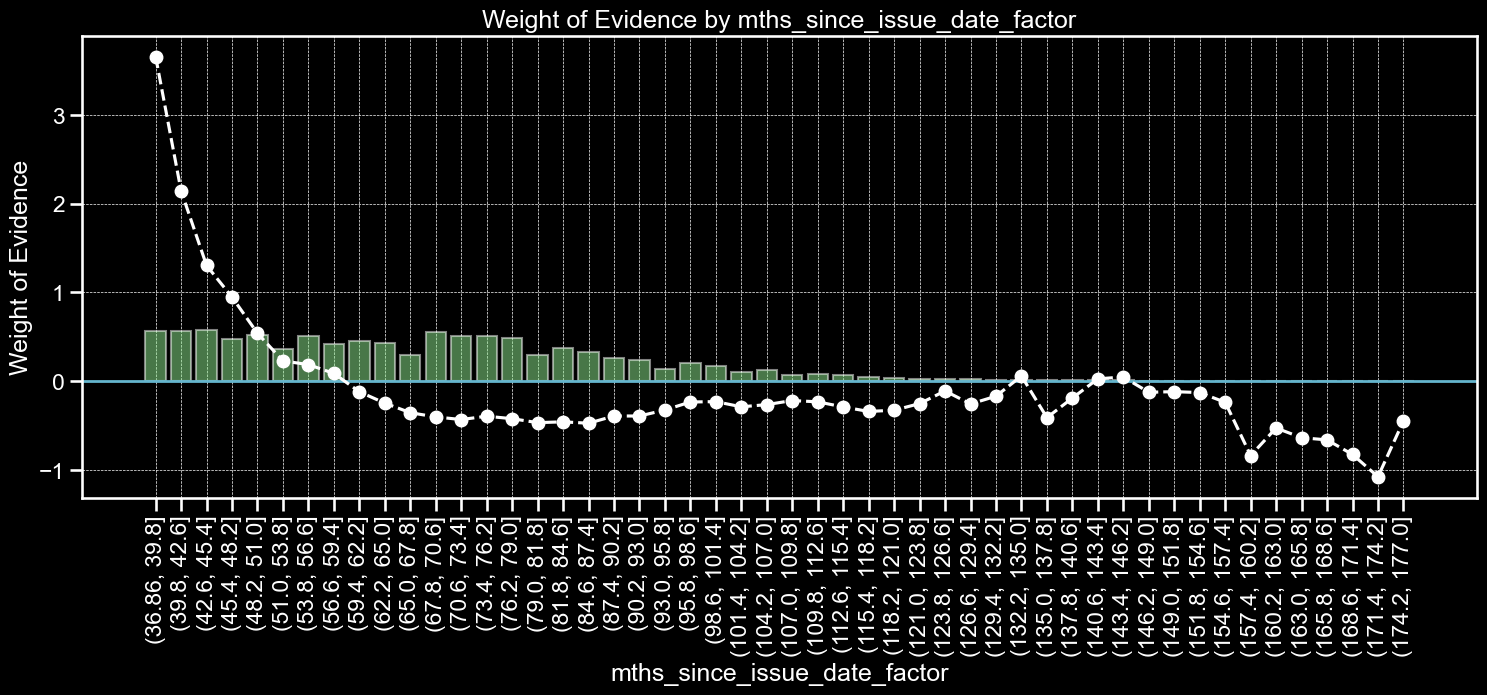

In [317]:
plot_by_woe(df_temp, 90)

In [318]:
# Firt 6 are in their own categories
df_temp.iloc[:6, 0]
# I <38

0    (36.86, 39.8]
1     (39.8, 42.6]
2     (42.6, 45.4]
3     (45.4, 48.2]
4     (48.2, 51.0]
5     (51.0, 53.8]
Name: mths_since_issue_date_factor, dtype: category
Categories (50, interval[float64, right]): [(36.86, 39.8] < (39.8, 42.6] < (42.6, 45.4] < (45.4, 48.2] ... (165.8, 168.6] < (168.6, 171.4] < (171.4, 174.2] < (174.2, 177.0]]

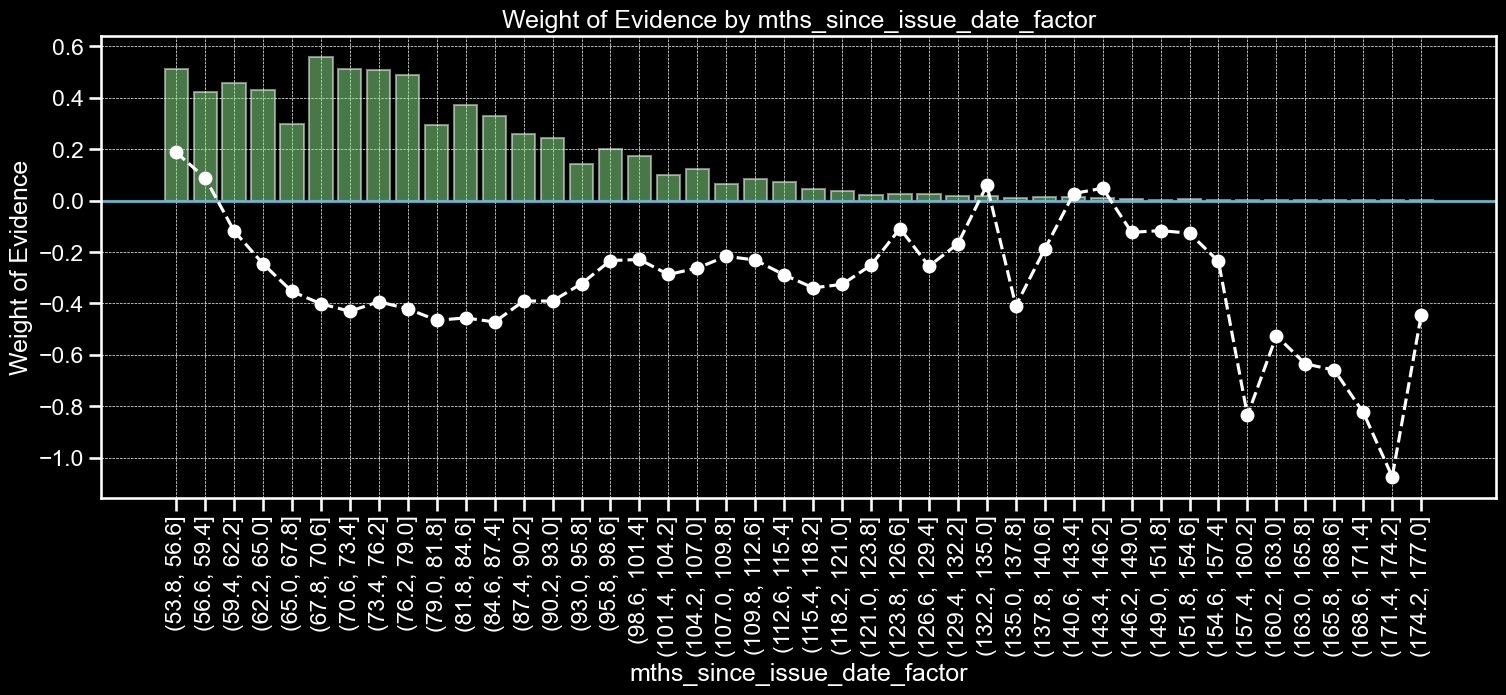

In [319]:
plot_by_woe(df_temp.iloc[6:, :], 90)

In [320]:
dummies['mths_since_issue_date:<40'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(40)), 1, 0)
dummies['mths_since_issue_date:40-43'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(40, 44)), 1, 0)
dummies['mths_since_issue_date:44-45'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(44, 46)), 1, 0)
dummies['mths_since_issue_date:46-48'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(46, 49)), 1, 0)
dummies['mths_since_issue_date:47-51'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(49, 52)), 1, 0)
dummies['mths_since_issue_date:52-55'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(52, 55)), 1, 0)
dummies['mths_since_issue_date:55-59'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(55, 60)), 1, 0)
dummies['mths_since_issue_date:60-65'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(60, 66)), 1, 0)
dummies['mths_since_issue_date:66-76'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(66, 77)), 1, 0)
dummies['mths_since_issue_date:77-96'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(77, 97)), 1, 0)
dummies['mths_since_issue_date:97-113'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(97, 114)), 1, 0)
dummies['mths_since_issue_date:114-135'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(114, 136)), 1, 0)
dummies['mths_since_issue_date:>136'] = np.where(df_inputs_prepr['mths_since_issue_date'].isin(range(136, int(df_inputs_prepr['mths_since_issue_date'].max()))), 1, 0)

ref_categorie.append('mths_since_issue_date:>136')

V: int_rate

In [321]:
df_inputs_prepr['int_rate'].describe()

count   452134.000000
mean        13.099709
std          4.833285
min          5.310000
25%          9.490000
50%         12.620000
75%         15.990000
max         30.990000
Name: int_rate, dtype: float64

In [322]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [323]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
st(df_temp)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


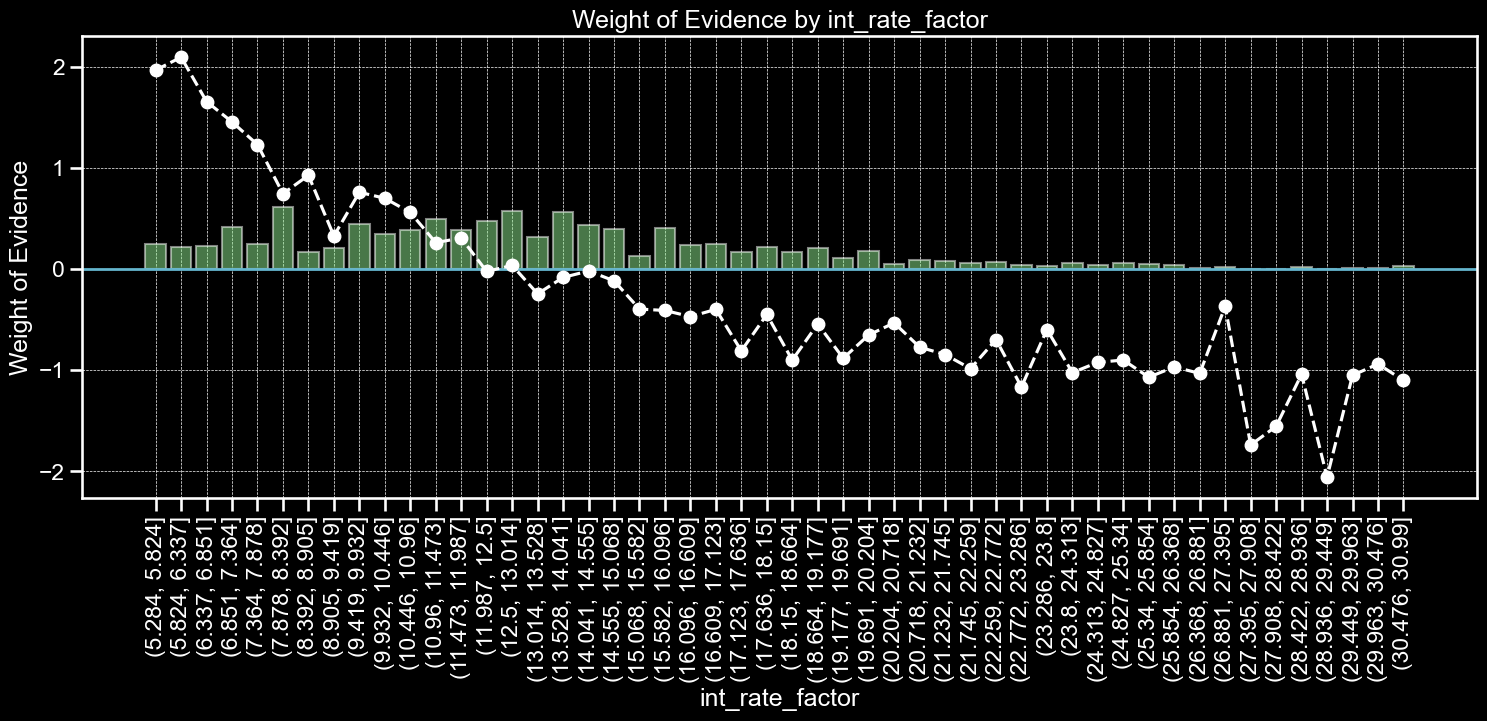

In [324]:
plot_by_woe(df_temp, 90)

In [325]:
dummies['int_rate:<8.392'] = np.where((df_inputs_prepr['int_rate'] <= 8.392), 1, 0)
dummies['int_rate:8.392-11.987'] = np.where(((df_inputs_prepr['int_rate'] > 8.392) & (df_inputs_prepr['int_rate'] <= 11.987)), 1, 0)
dummies['int_rate:11.987-15.068'] = np.where(((df_inputs_prepr['int_rate'] > 11.987) & (df_inputs_prepr['int_rate'] <= 15.068)), 1, 0)
dummies['int_rate:15.068-22.772'] = np.where(((df_inputs_prepr['int_rate'] > 15.068) & (df_inputs_prepr['int_rate'] <= 22.772)), 1, 0)
dummies['int_rate:>22.772'] = np.where((df_inputs_prepr['int_rate'] > 22.772), 1, 0)

ref_categorie.append('int_rate:>22.772')

V: funded_amnt

In [326]:
df_inputs_prepr['funded_amnt'].describe()

count   452134.000000
mean     15061.187225
std       9190.879632
min        500.000000
25%       8000.000000
50%      12975.000000
75%      20000.000000
max      40000.000000
Name: funded_amnt, dtype: float64

In [327]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

In [328]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
st(df_temp)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


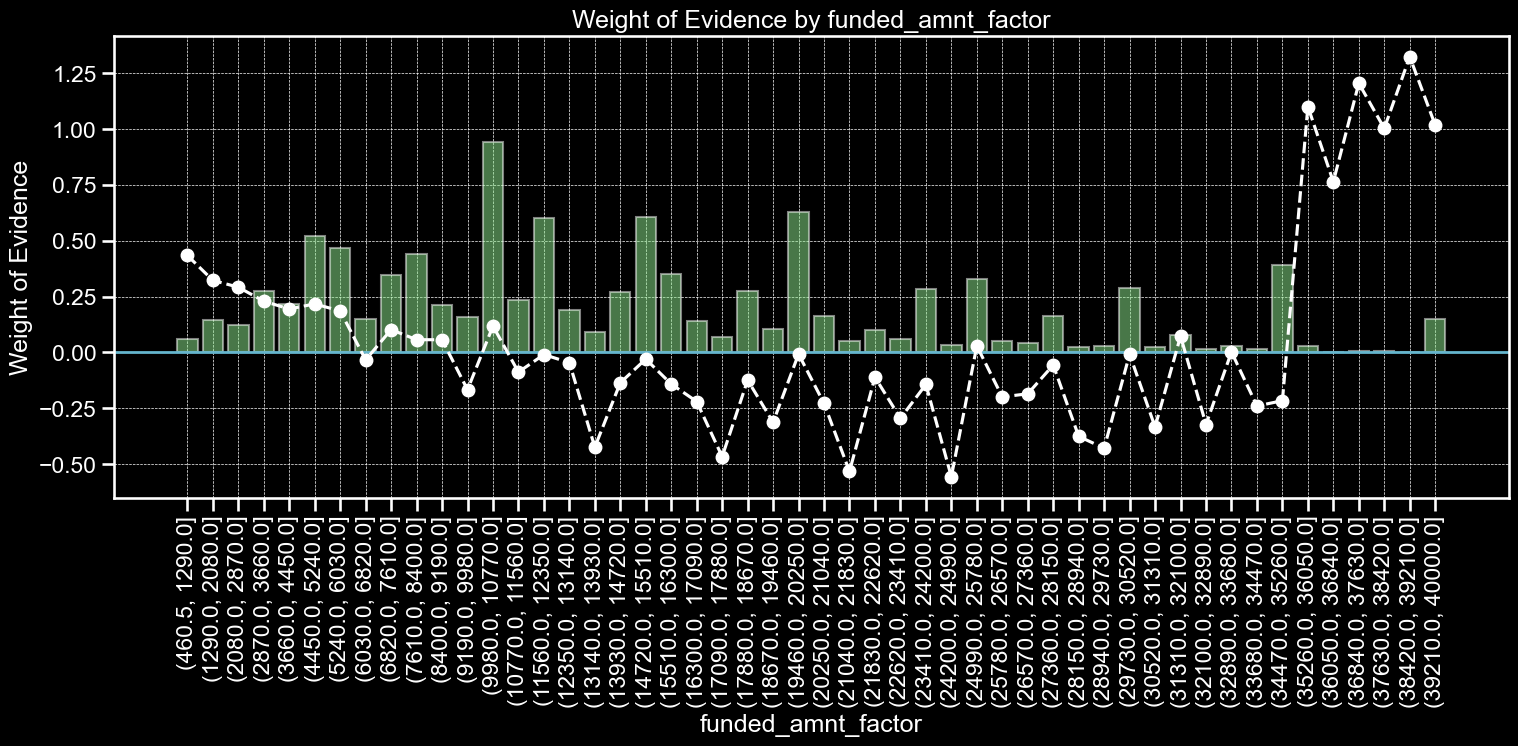

In [329]:
plot_by_woe(df_temp, 90)
# There seems to be no association whatsoever between 'funded amount' and WoE

V: mths_since_earliest_cr_line

In [330]:
df_inputs_prepr['mths_since_earliest_cr_line'].describe()

count   452134.000000
mean       218.901133
std         95.331547
min          0.000000
25%        153.000000
50%        203.000000
75%        269.000000
max       1021.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [331]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

In [332]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
st(df_temp)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


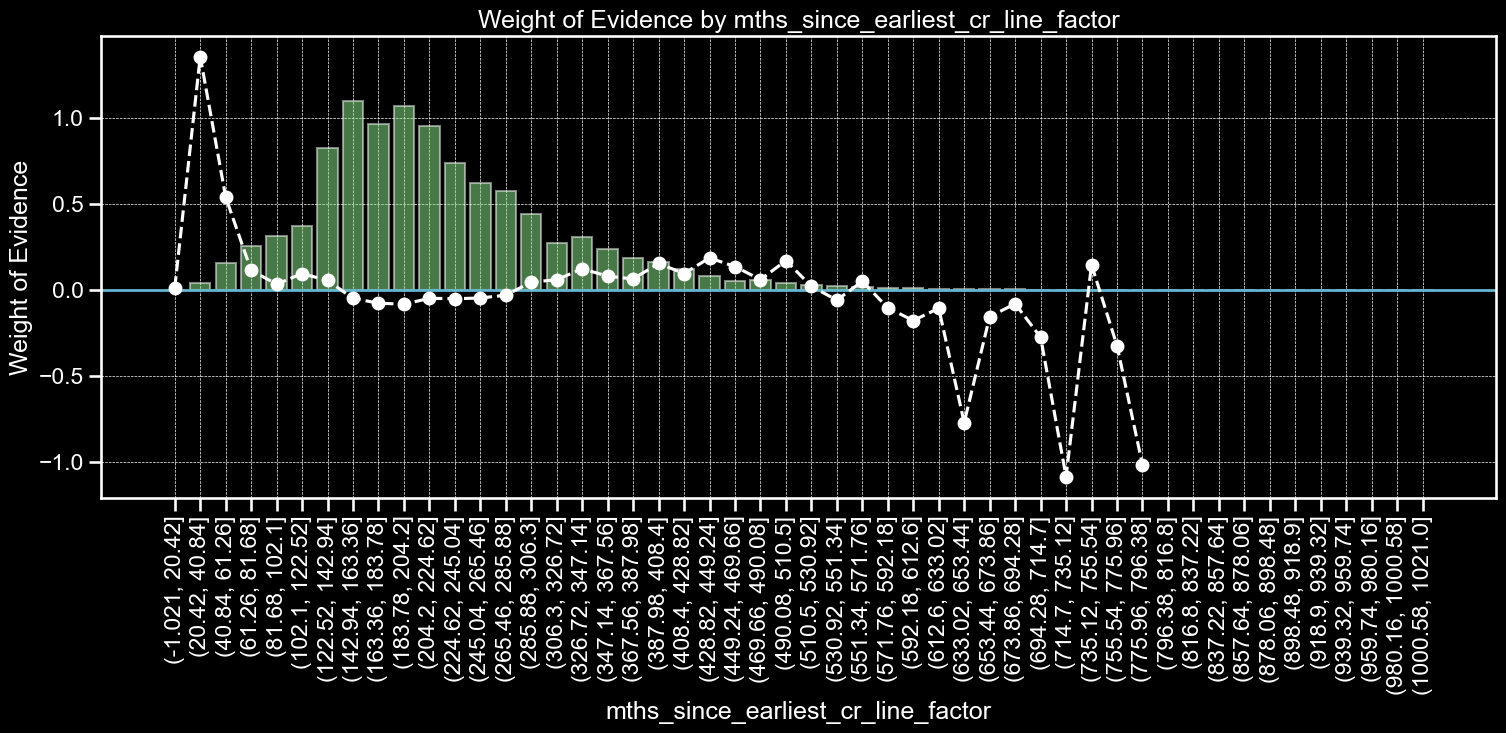

In [333]:
plot_by_woe(df_temp, 90)

In [334]:
# <=21
# 22-41
# 42-62
# 63


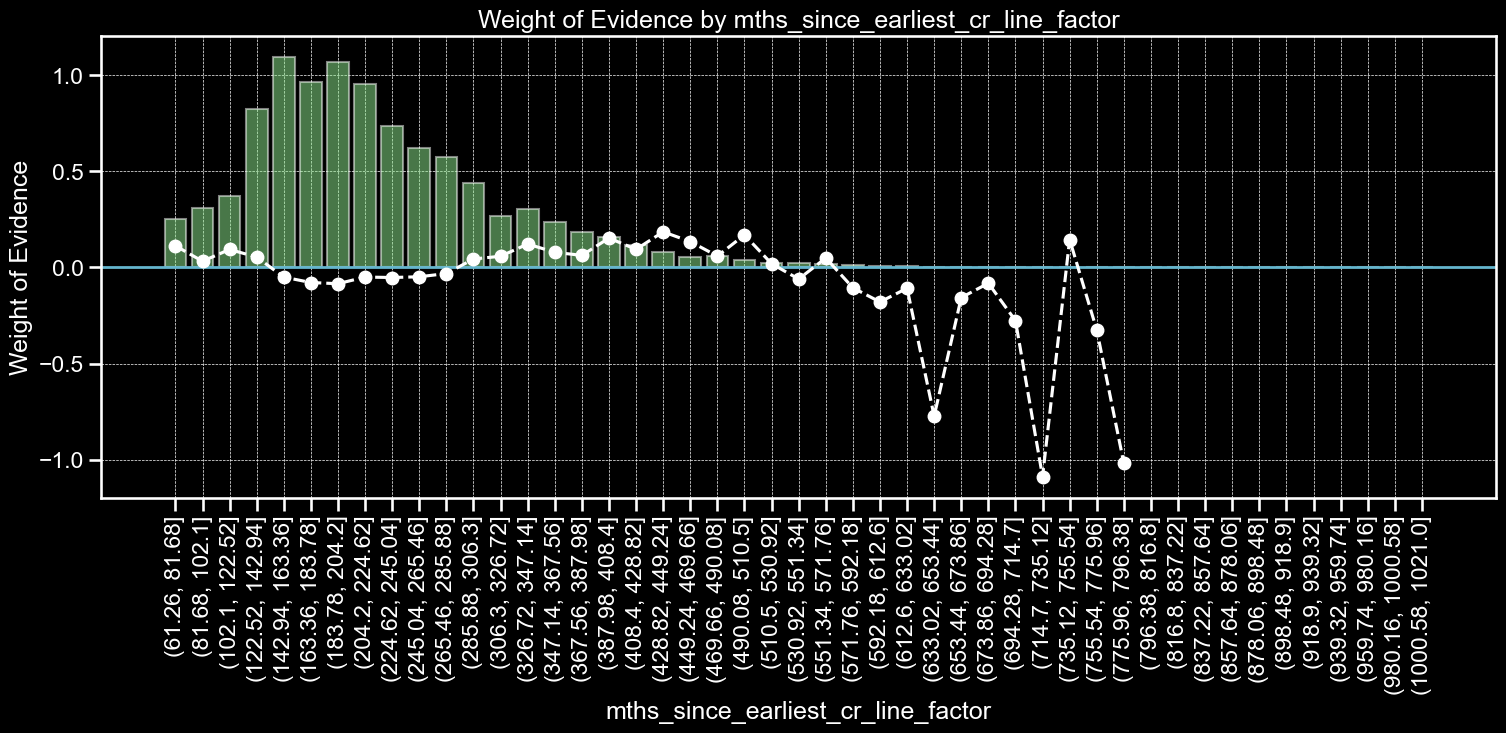

In [335]:
plot_by_woe(df_temp.iloc[3:, :], 90)

In [336]:
dummies['mths_since_earliest_cr_line:<22'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(22)), 1, 0)
dummies['mths_since_earliest_cr_line:22-41'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(22, 42)), 1, 0)
dummies['mths_since_earliest_cr_line:42-62'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(42, 63)), 1, 0)
dummies['mths_since_earliest_cr_line:63-144'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(63, 145)), 1, 0)
dummies['mths_since_earliest_cr_line:145-310'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(145, 311)), 1, 0)
dummies['mths_since_earliest_cr_line:311-537'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(311, 538)), 1, 0)
dummies['mths_since_earliest_cr_line:>538'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(538, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

ref_categorie.append('mths_since_earliest_cr_line:>538')

V: annual_inc

In [337]:
# We consider higher income anything above 250 000
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 250000, :]

In [338]:
df_inputs_prepr['annual_inc'].notnull().value_counts()

annual_inc
True    452134
Name: count, dtype: int64

In [339]:
df_inputs_prepr_temp['annual_income_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_income_factor', df_targets_prepr)
st(df_temp)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\3169043710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_income_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be chan

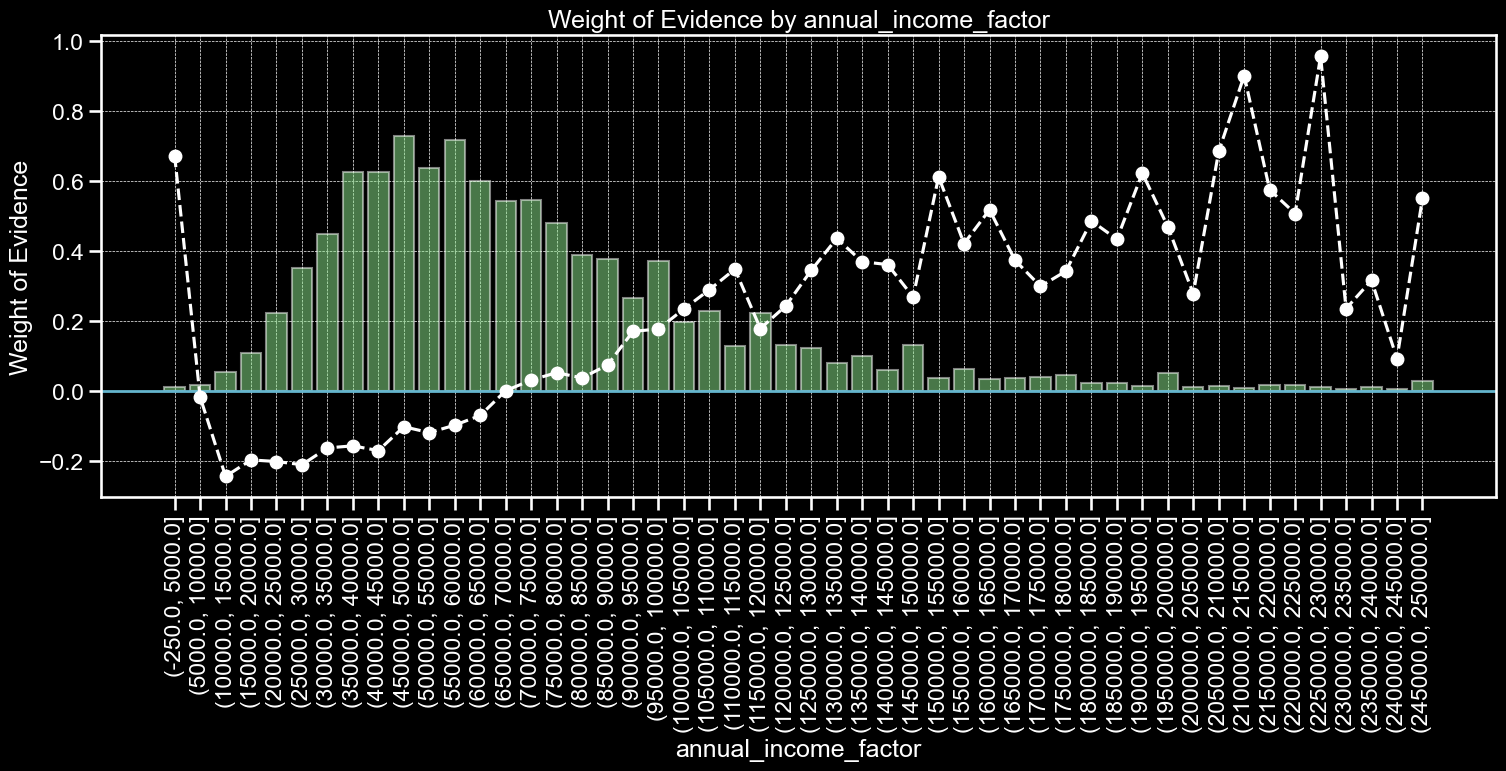

In [340]:
plot_by_woe(df_temp, 90)

In [341]:
dummies['annual_inc:<=5k'] = np.where((df_inputs_prepr['annual_inc'] <= 5000), 1, 0)
dummies['annual_inc:5k-10k'] = np.where(((df_inputs_prepr['annual_inc'] > 5000) & (df_inputs_prepr['annual_inc'] <= 10000)), 1, 0)
dummies['annual_inc:10k-30k'] = np.where(((df_inputs_prepr['annual_inc'] > 10000) & (df_inputs_prepr['annual_inc'] <= 30000)), 1, 0)
dummies['annual_inc:30k-45k'] = np.where(((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 45000)), 1, 0)
dummies['annual_inc:45k-65k'] = np.where(((df_inputs_prepr['annual_inc'] > 45000) & (df_inputs_prepr['annual_inc'] <= 65000)), 1, 0)
dummies['annual_inc:65k-85k'] = np.where(((df_inputs_prepr['annual_inc'] > 65000) & (df_inputs_prepr['annual_inc'] <= 85000)), 1, 0)
dummies['annual_inc:85k-100k'] = np.where(((df_inputs_prepr['annual_inc'] > 85000) & (df_inputs_prepr['annual_inc'] <= 100000)), 1, 0)
dummies['annual_inc:100k-125k'] = np.where(((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 125000)), 1, 0)
dummies['annual_inc:125k-160k'] = np.where(((df_inputs_prepr['annual_inc'] > 125000) & (df_inputs_prepr['annual_inc'] <= 160000)), 1, 0)
dummies['annual_inc:160k-185k'] = np.where(((df_inputs_prepr['annual_inc'] > 160000) & (df_inputs_prepr['annual_inc'] <= 185000)), 1, 0)
dummies['annual_inc:185k-200k'] = np.where(((df_inputs_prepr['annual_inc'] > 185000) & (df_inputs_prepr['annual_inc'] <= 200000)), 1, 0)
dummies['annual_inc:>200k'] = np.where((df_inputs_prepr['annual_inc'] > 200000), 1, 0)

ref_categorie.append('annual_inc:185k-200k')

V: mths_since_last_delinq

In [342]:
df_inputs_prepr['mths_since_last_delinq'].describe()

count   220878.000000
mean        34.613099
std         21.950931
min          0.000000
25%         16.000000
50%         31.000000
75%         50.000000
max        226.000000
Name: mths_since_last_delinq, dtype: float64

In [343]:
pd.notnull(df_inputs_prepr['mths_since_last_delinq']).value_counts()

mths_since_last_delinq
False    231256
True     220878
Name: count, dtype: int64

In [344]:

print(f"""For mths_since_last_delinq are {df_inputs_prepr['mths_since_last_delinq'].isnull().sum()} null values.
Are more null values from the total, by a factor of {df_inputs_prepr['mths_since_last_delinq'].isnull().sum() / df_inputs_prepr['mths_since_last_delinq'].isnull().count()}""")

For mths_since_last_delinq are 231256 null values.
Are more null values from the total, by a factor of 0.5114766861151783


In [345]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\2459205453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


In [346]:
df_temp =  woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
st(df_temp)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:

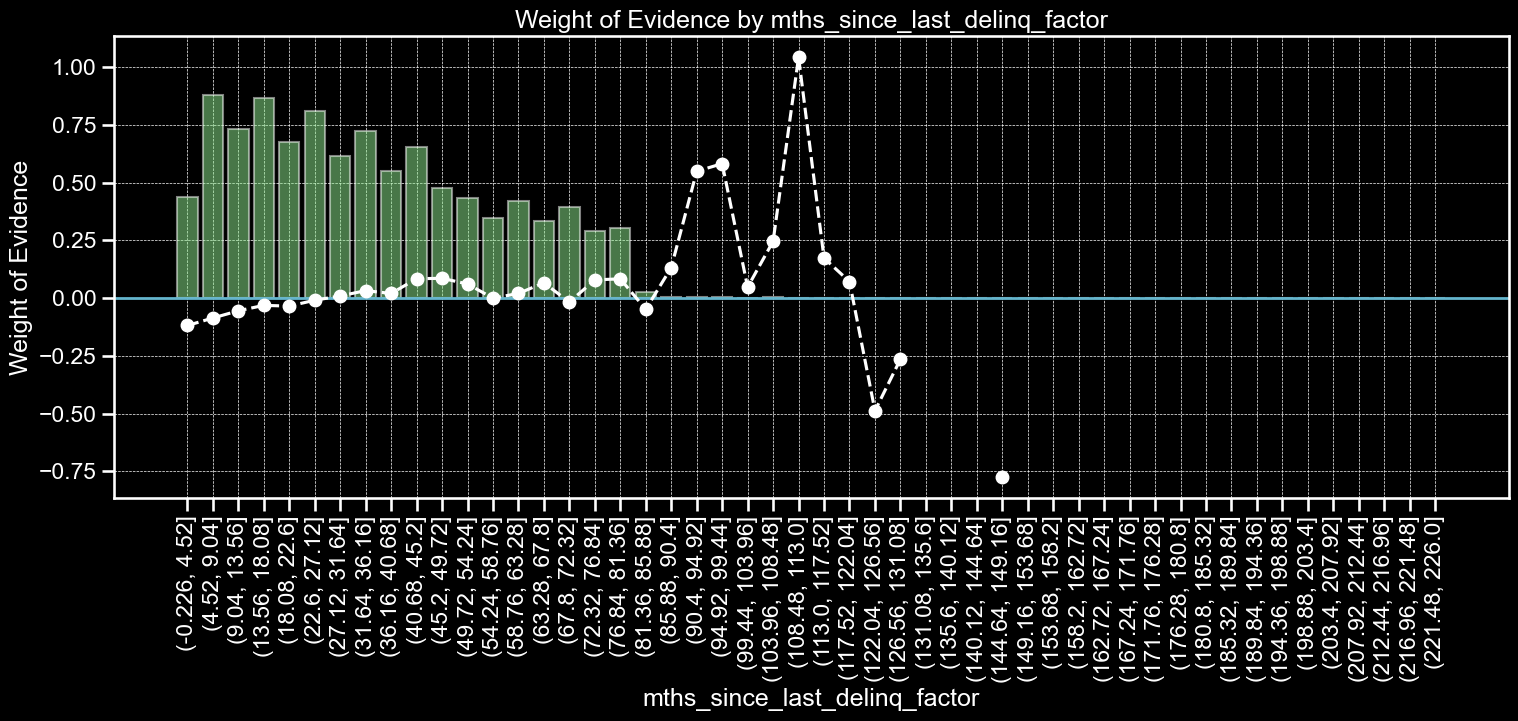

In [347]:
plot_by_woe(df_temp, 90)

In [348]:
dummies['mths_since_last_delinq:Missing'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isnull(), 1, 0)
dummies['mths_since_last_delinq:0-4'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isin(range(5)), 1, 0)
dummies['mths_since_last_delinq:5-19'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isin(range(5, 20)), 1, 0)
dummies['mths_since_last_delinq:20-85'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isin(range(20, 86)), 1, 0)
dummies['mths_since_last_delinq:>86'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isin(range(86, int(df_inputs_prepr['mths_since_last_delinq'].max()))), 1, 0)

ref_categorie.append('mths_since_last_delinq:Missing')

V: dti = dept to income ratio

In [349]:
df_inputs_prepr['dti'].describe()

count   451784.000000
mean        18.858336
std         14.393525
min         -1.000000
25%         11.930000
50%         17.870000
75%         24.510000
max        999.000000
Name: dti, dtype: float64

In [350]:
df_inputs_prepr['dti'].notnull().value_counts()

dti
True     451784
False       350
Name: count, dtype: int64

In [351]:
df_inputs_prepr['dti'] = df_inputs_prepr['dti'].fillna(df_inputs_prepr['dti'].median()) # or df_inputs_prepr['dti'].fillna(df_inputs_prepr['dti'].median(), inplace=True)

In [352]:
df_inputs_prepr['dti'].notnull().value_counts()

dti
True    452134
Name: count, dtype: int64

In [353]:
df_inputs_prepr['dti'].loc[df_inputs_prepr['dti'] < 0]

723428   -1.000000
Name: dti, dtype: float64

In [354]:
if (df_inputs_prepr['dti'].loc[df_inputs_prepr['dti'] < 0].values[0]):
    index = df_inputs_prepr['dti'].loc[df_inputs_prepr['dti'] < 0].index
    df_inputs_prepr.loc[index, 'dti'] = 0

In [355]:
df_inputs_prepr['dti'].loc[df_inputs_prepr['dti'] < 0]

Series([], Name: dti, dtype: float64)

In [356]:
df_inputs_prepr['dti'].describe()


count   452134.000000
mean        18.857573
std         14.387976
min          0.000000
25%         11.930000
50%         17.870000
75%         24.510000
max        999.000000
Name: dti, dtype: float64

In [357]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 800)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


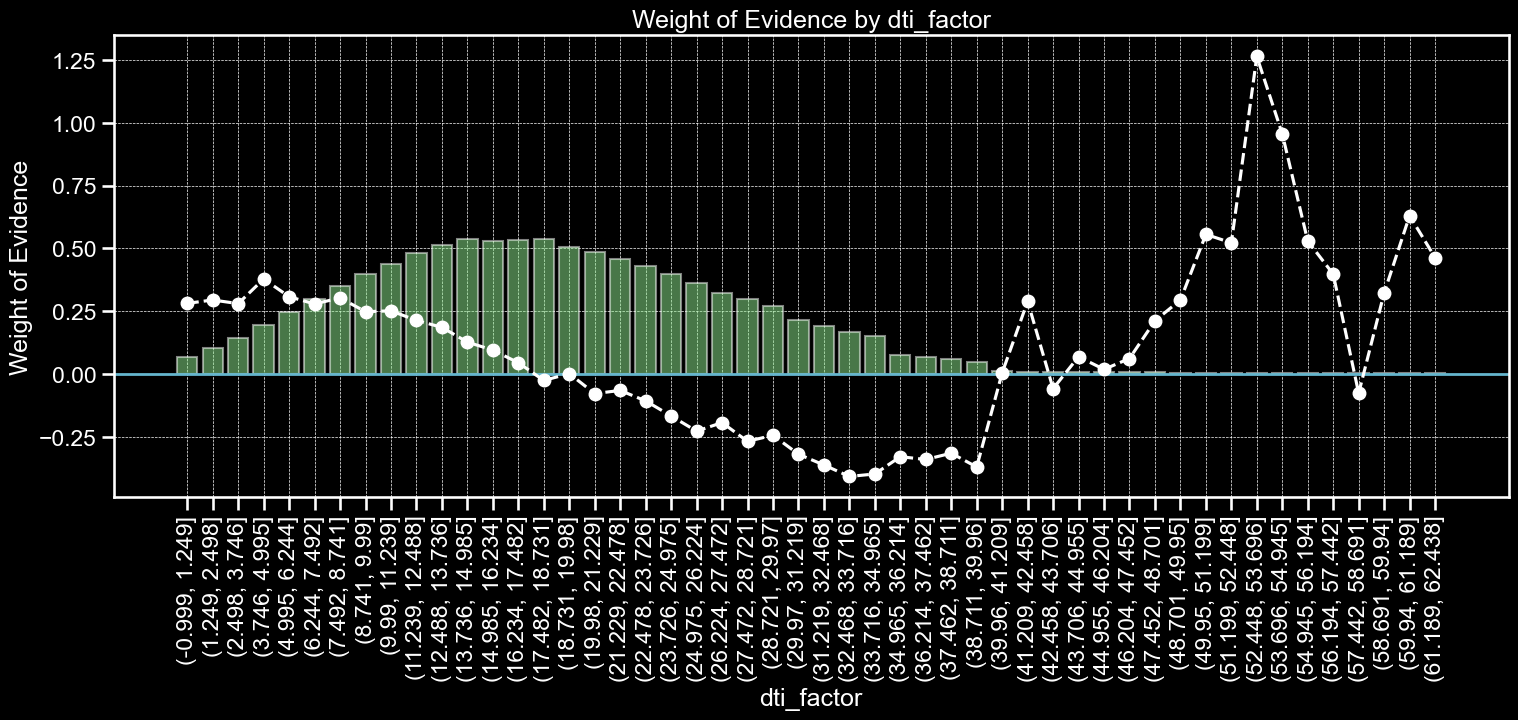

In [358]:
plot_by_woe(df_temp.iloc[:50, :], 90)

In [359]:
dummies['dti:<=2'] = np.where((df_inputs_prepr['dti'] <= 2), 1, 0)
dummies['dti:2-6'] = np.where((df_inputs_prepr['dti']) > 2 & (df_inputs_prepr['dti'] <= 6), 1, 0)
dummies['dti:6-10'] = np.where((df_inputs_prepr['dti']) > 6 & (df_inputs_prepr['dti'] <= 10), 1, 0)
dummies['dti:10-14'] = np.where((df_inputs_prepr['dti']) > 10 & (df_inputs_prepr['dti'] <= 14), 1, 0)
dummies['dti:14-19'] = np.where((df_inputs_prepr['dti']) > 14 & (df_inputs_prepr['dti'] <= 19), 1, 0)
dummies['dti:19-21'] = np.where((df_inputs_prepr['dti']) > 19 & (df_inputs_prepr['dti'] <= 21), 1, 0)
dummies['dti:21-26'] = np.where((df_inputs_prepr['dti']) > 21 & (df_inputs_prepr['dti'] <= 26), 1, 0)
dummies['dti:26-30'] = np.where((df_inputs_prepr['dti']) > 26 & (df_inputs_prepr['dti'] <= 30), 1, 0)
dummies['dti:30-35'] = np.where((df_inputs_prepr['dti']) > 30 & (df_inputs_prepr['dti'] <= 35), 1, 0)
dummies['dti:35-40'] = np.where((df_inputs_prepr['dti']) > 35 & (df_inputs_prepr['dti'] <= 40), 1, 0)
dummies['dti:40-52'] = np.where((df_inputs_prepr['dti']) > 40 & (df_inputs_prepr['dti'] <= 52), 1, 0)
dummies['dti:>52'] = np.where((df_inputs_prepr['dti'] > 52), 1, 0)

ref_categorie.append('dti:>52')

V: installment

In [360]:
df_inputs_prepr['installment'].describe()

count   452134.000000
mean       446.355311
std        267.190007
min         15.690000
25%        251.750000
50%        378.860000
75%        593.950000
max       1715.420000
Name: installment, dtype: float64

In [361]:
df_inputs_prepr['installment'].notnull().value_counts()

installment
True    452134
Name: count, dtype: int64

In [362]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


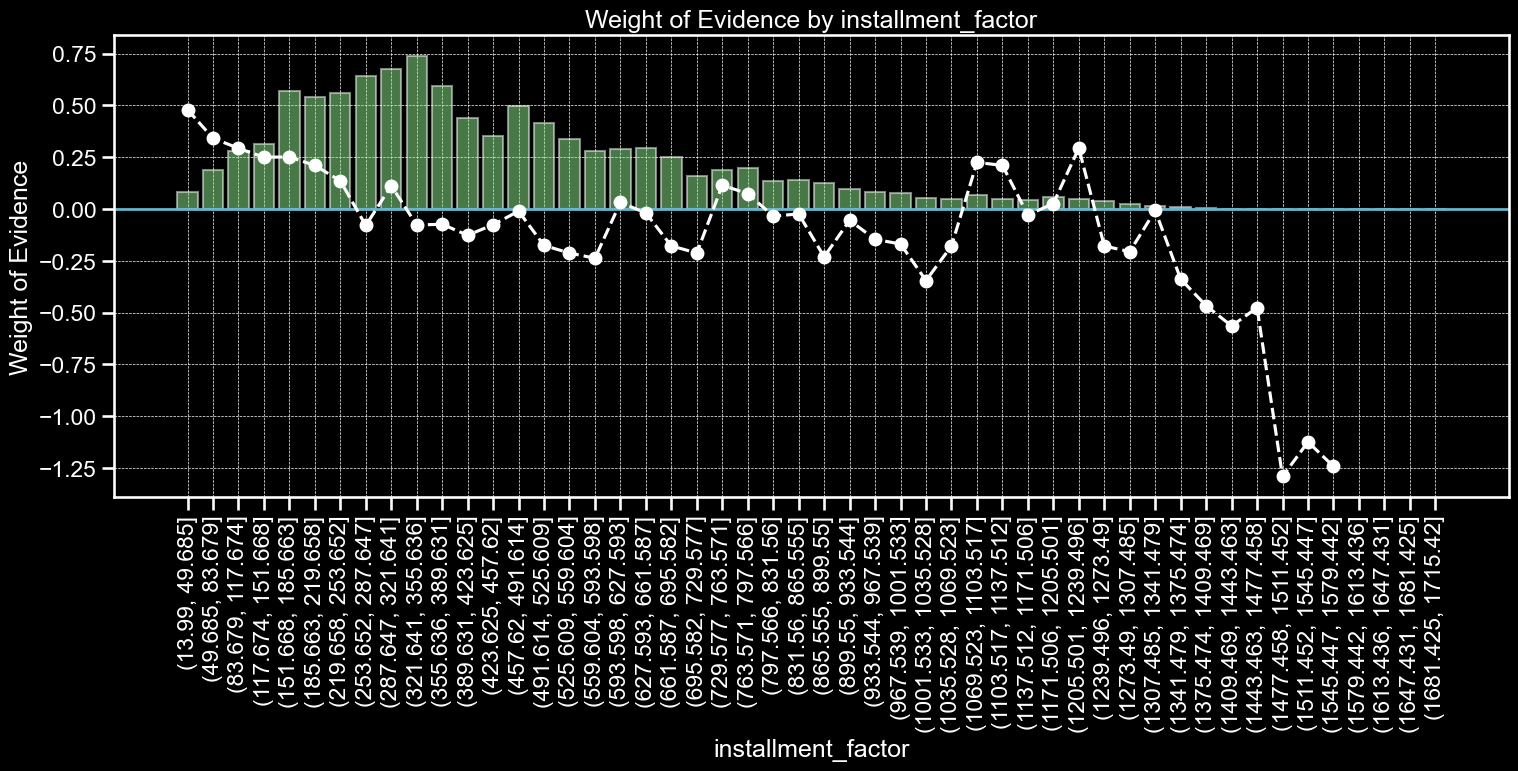

In [363]:
plot_by_woe(df_temp, 90)
# Skip this variable. There seems to be no association whatsoever between 'installment' and WoE

V: delinq_2yrs

In [364]:
df_inputs_prepr['delinq_2yrs'].describe()

count   452134.000000
mean         0.307307
std          0.868425
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: delinq_2yrs, dtype: float64

In [365]:
df_inputs_prepr['delinq_2yrs'].notnull().value_counts()

delinq_2yrs
True    452134
Name: count, dtype: int64

In [366]:
df_inputs_prepr['delinq_2yrs_factor'] = pd.cut(df_inputs_prepr['delinq_2yrs'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


In [367]:
st(df_temp.iloc[:20, :])

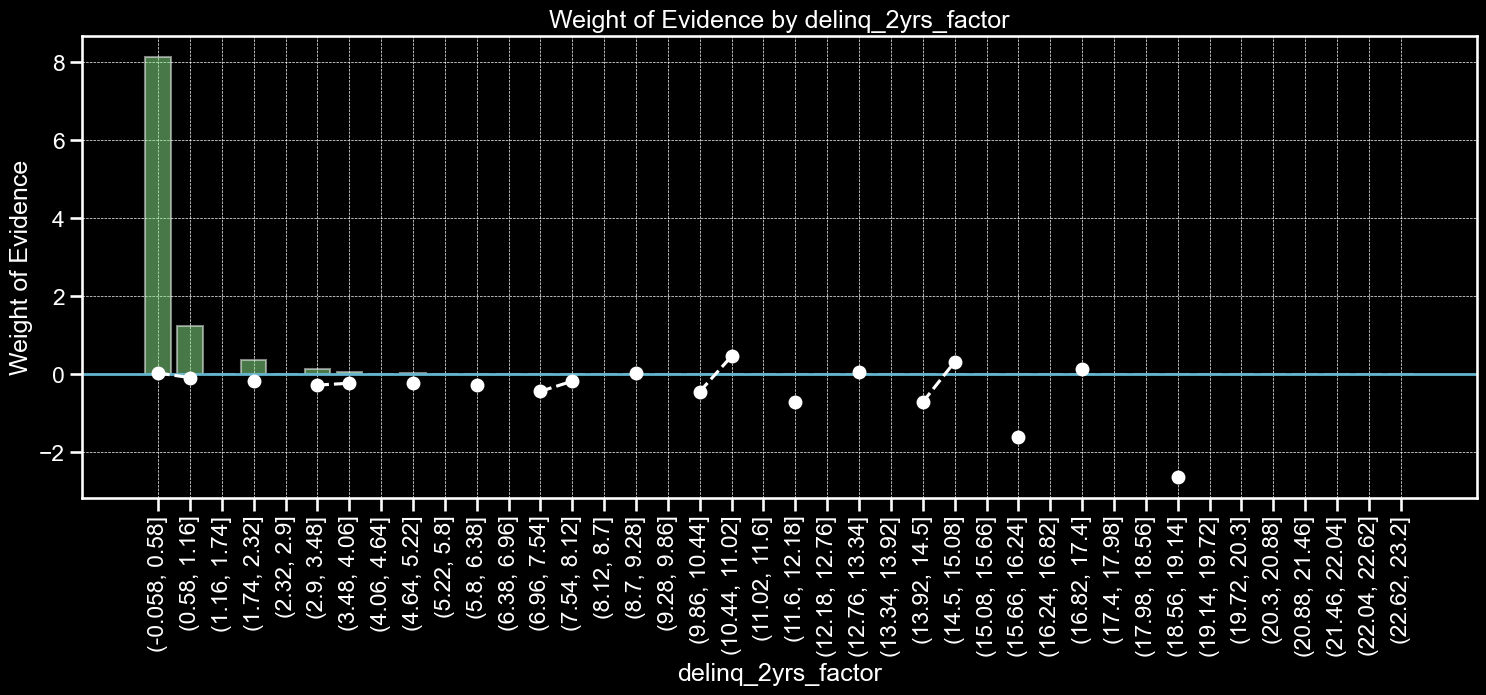

In [368]:
plot_by_woe(df_temp.iloc[ :40, :], 90)

In [369]:
dummies['delinq_2yrs:<=0.42'] = np.where((df_inputs_prepr['delinq_2yrs'] <= 0.42), 1, 0)
dummies['delinq_2yrs:0.42-0.84'] = np.where((df_inputs_prepr['delinq_2yrs'] > 0.42) & (df_inputs_prepr['delinq_2yrs'] <= 0.84), 1, 0)
dummies['delinq_2yrs:0.84-1.26'] = np.where((df_inputs_prepr['delinq_2yrs'] > 0.84) & (df_inputs_prepr['delinq_2yrs'] <= 1.26), 1, 0)
dummies['delinq_2yrs:1.26-2.1'] = np.where((df_inputs_prepr['delinq_2yrs'] > 1.26) & (df_inputs_prepr['delinq_2yrs'] <= 2.1), 1, 0)
dummies['delinq_2yrs:2.1-3.36'] = np.where((df_inputs_prepr['delinq_2yrs'] > 2.1) & (df_inputs_prepr['delinq_2yrs'] <= 3.36), 1, 0)
dummies['delinq_2yrs:>3.36'] = np.where((df_inputs_prepr['delinq_2yrs'] > 3.36), 1, 0)

ref_categorie.append('delinq_2yrs:>3.36')


V: inq_last_6mths


In [370]:
df_inputs_prepr['inq_last_6mths'].describe()

count   452134.000000
mean         0.577271
std          0.885749
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         24.000000
Name: inq_last_6mths, dtype: float64

In [371]:
df_inputs_prepr['inq_last_6mths'].notnull().value_counts()

inq_last_6mths
True    452134
Name: count, dtype: int64

In [372]:
df_inputs_prepr['inq_last_6mths_factor'] = pd.cut(df_inputs_prepr['inq_last_6mths'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


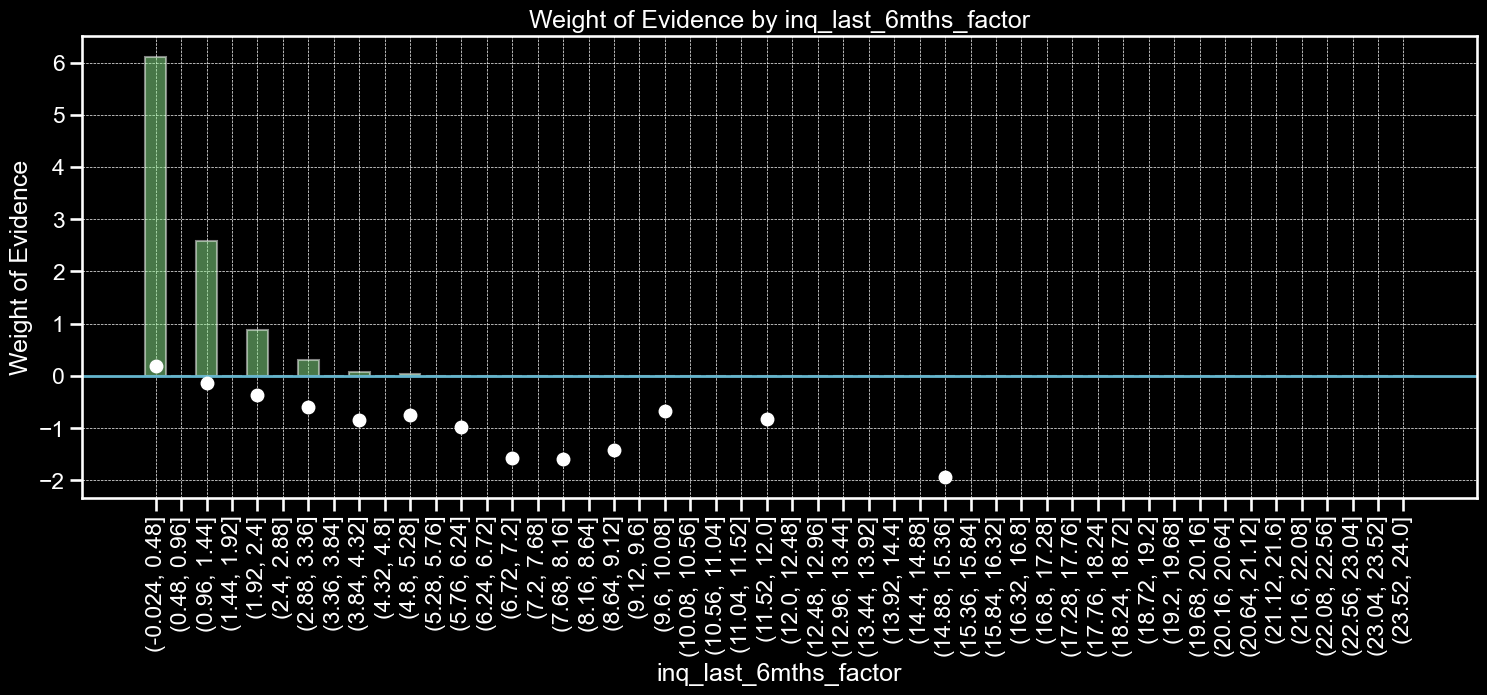

In [373]:
plot_by_woe(df_temp, 90)

In [374]:
dummies['inq_last_6mths:<=1.32'] = np.where((df_inputs_prepr['inq_last_6mths'] <= 1.32), 1, 0)
dummies['inq_last_6mths:1.32-3.3'] = np.where((df_inputs_prepr['inq_last_6mths'] > 1.32) & (df_inputs_prepr['inq_last_6mths'] <= 3.3), 1, 0)
dummies['inq_last_6mths:3.3-5.28'] = np.where((df_inputs_prepr['inq_last_6mths'] > 3.3) & (df_inputs_prepr['inq_last_6mths'] <= 5.28), 1, 0)
dummies['inq_last_6mths:>5.28'] = np.where((df_inputs_prepr['inq_last_6mths'] > 5.28), 1, 0)

ref_categorie.append('inq_last_6mths:>5.28')

V: open_acc

In [375]:
df_inputs_prepr['open_acc'].describe()

count   452134.000000
mean        11.625401
std          5.636002
min          0.000000
25%          8.000000
50%         11.000000
75%         14.000000
max         94.000000
Name: open_acc, dtype: float64

In [376]:
df_inputs_prepr['open_acc_factor'] = pd.cut(df_inputs_prepr['open_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


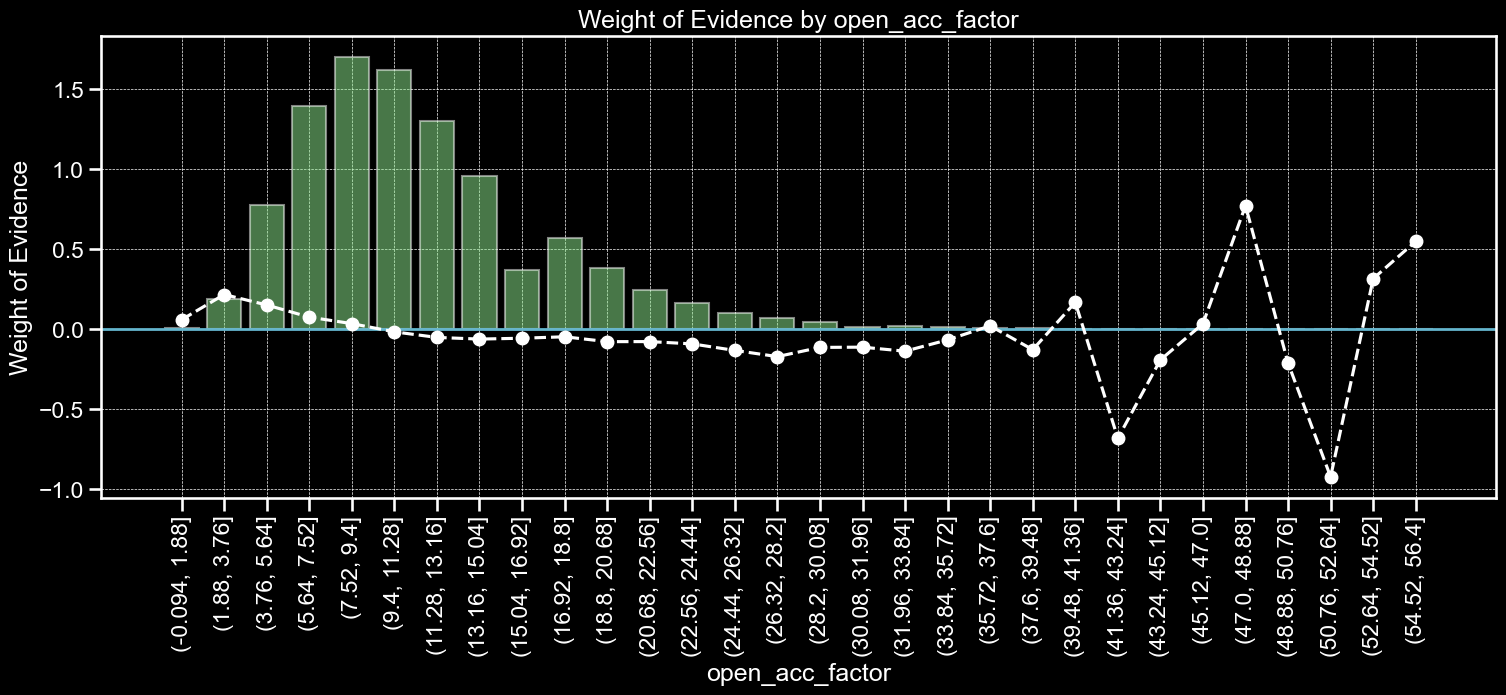

In [377]:
plot_by_woe(df_temp.iloc[:30, :], 90)

In [378]:
dummies['open_acc:<=6'] = np.where((df_inputs_prepr['open_acc'] <= 6), 1, 0)
dummies['open_acc:6-8'] = np.where((df_inputs_prepr['open_acc'] > 6) & (df_inputs_prepr['open_acc'] <= 8), 1, 0)
dummies['open_acc:8-32'] = np.where((df_inputs_prepr['open_acc'] > 8) & (df_inputs_prepr['open_acc'] <= 32), 1, 0)
dummies['open_acc:>32'] = np.where((df_inputs_prepr['open_acc'] > 32), 1, 0)

ref_categorie.append('open_acc:>32')

V: pub_rec

In [379]:
df_inputs_prepr['pub_rec'].describe()

count   452134.000000
mean         0.199381
std          0.567685
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         37.000000
Name: pub_rec, dtype: float64

In [380]:
df_inputs_prepr['pub_rec_factor'] = pd.cut(df_inputs_prepr['pub_rec'], 300)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


In [381]:
st(df_temp)

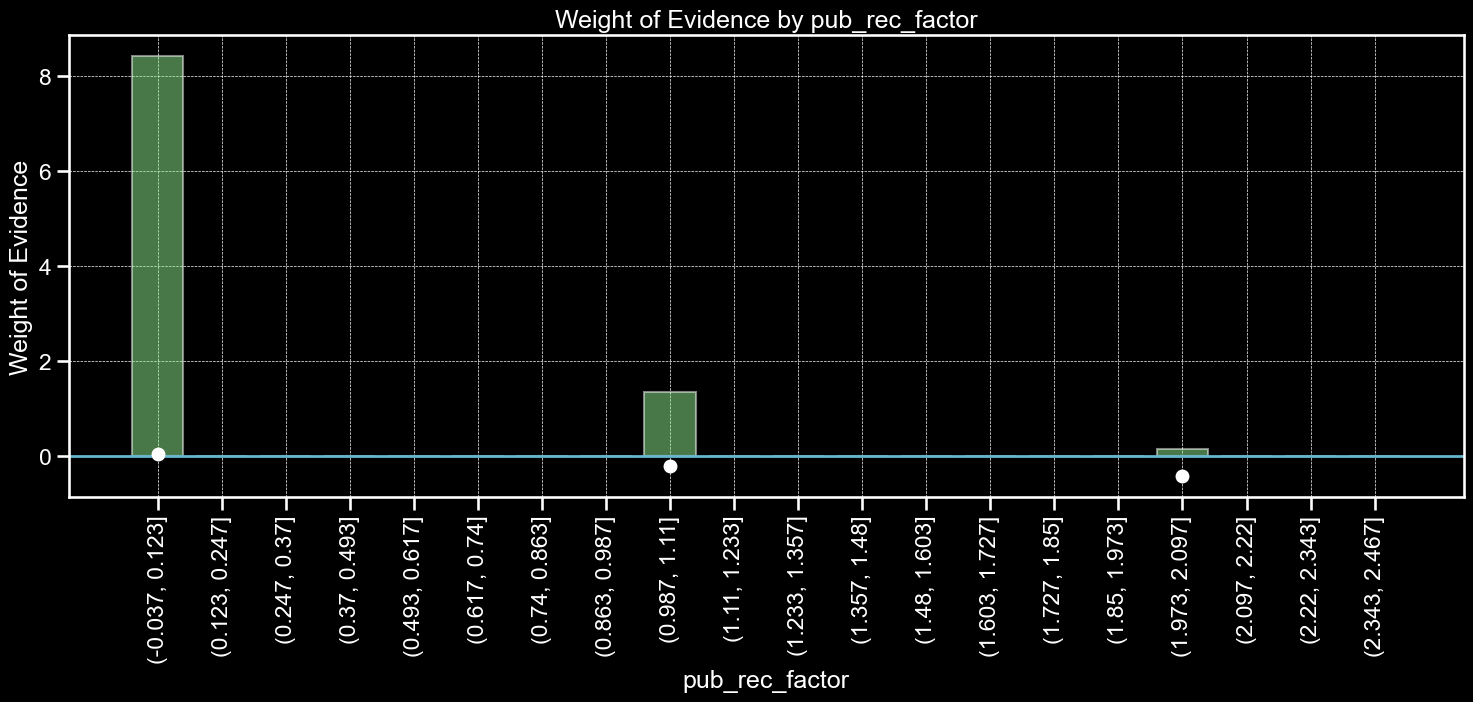

In [382]:
plot_by_woe(df_temp.iloc[:20, :], 90)

In [383]:
dummies['pub_rec:<=0.287'] = np.where((df_inputs_prepr['pub_rec'] <= 0.287), 1, 0)
dummies['pub_rec:0.287-1.147'] = np.where((df_inputs_prepr['pub_rec'] > 0.287) & (df_inputs_prepr['pub_rec'] <= 1.147), 1, 0)
dummies['pub_rec:1.147-2'] = np.where((df_inputs_prepr['pub_rec'] > 1.147) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
dummies['pub_rec:>2'] = np.where((df_inputs_prepr['pub_rec'] > 2), 1, 0)

ref_categorie.append('pub_rec:>2')

V: total_acc

In [384]:
df_inputs_prepr['total_acc'].describe()

count   452134.000000
mean        24.172409
std         11.962143
min          0.000000
25%         15.000000
50%         22.000000
75%         31.000000
max        169.000000
Name: total_acc, dtype: float64

In [385]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [386]:
st(df_temp)

c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:4068: RuntimeWarning: invalid value encountered in scalar divide
  -mid / (right - left) + 0.5 if mid < 0 else -left / (right - left)
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:4074: RuntimeWarning: invalid value encountered in scalar divide
  start, end = z_frac, (x - left) / (right - left)
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:4072: RuntimeWarning: invalid value encountered in scalar divide
  start, end = (x - left) / (right - left), z_frac
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:4072: RuntimeWarning: invalid value encountered in scalar subtract
  start, end = (x - left) / (right - left), z_frac


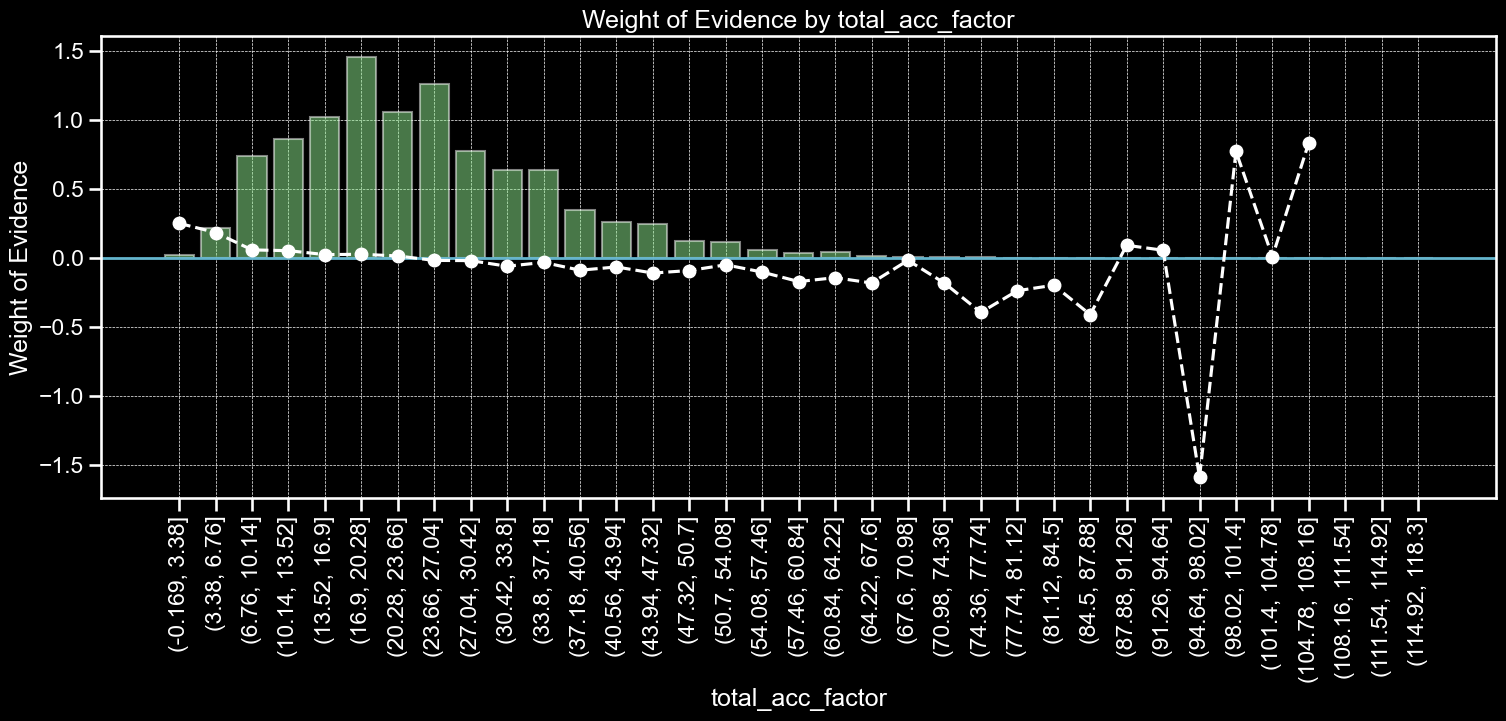

In [387]:
plot_by_woe(df_temp.iloc[:35, :], 90)

In [388]:
dummies['total_acc:<=4'] = np.where((df_inputs_prepr['total_acc'] <= 4), 1, 0)
dummies['total_acc:4-11'] = np.where((df_inputs_prepr['total_acc'] > 4) & (df_inputs_prepr['total_acc'] <= 11), 1, 0)
dummies['total_acc:11-35'] = np.where((df_inputs_prepr['total_acc'] > 11) & (df_inputs_prepr['total_acc'] <= 35), 1, 0)
dummies['total_acc:35-56'] = np.where((df_inputs_prepr['total_acc'] > 35) & (df_inputs_prepr['total_acc'] <= 56), 1, 0)
dummies['total_acc:56-84'] = np.where((df_inputs_prepr['total_acc'] > 56) & (df_inputs_prepr['total_acc'] <= 84), 1, 0)
dummies['total_acc:>84'] = np.where((df_inputs_prepr['total_acc'] > 84), 1, 0)

ref_categorie.append('total_acc:>84')

V: total_rev_hi_lim

In [389]:
df_inputs_prepr['total_rev_hi_lim'].describe()

count    452134.000000
mean      33920.695274
std       37437.540048
min           0.000000
25%       14100.000000
50%       24800.000000
75%       42400.000000
max     9999999.000000
Name: total_rev_hi_lim, dtype: float64

In [390]:
df_inputs_prepr['total_rev_hi_lim'].notnull().value_counts()

total_rev_hi_lim
True    452134
Name: count, dtype: int64

In [391]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 200)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


In [392]:
st(df_temp.iloc[:10, :])

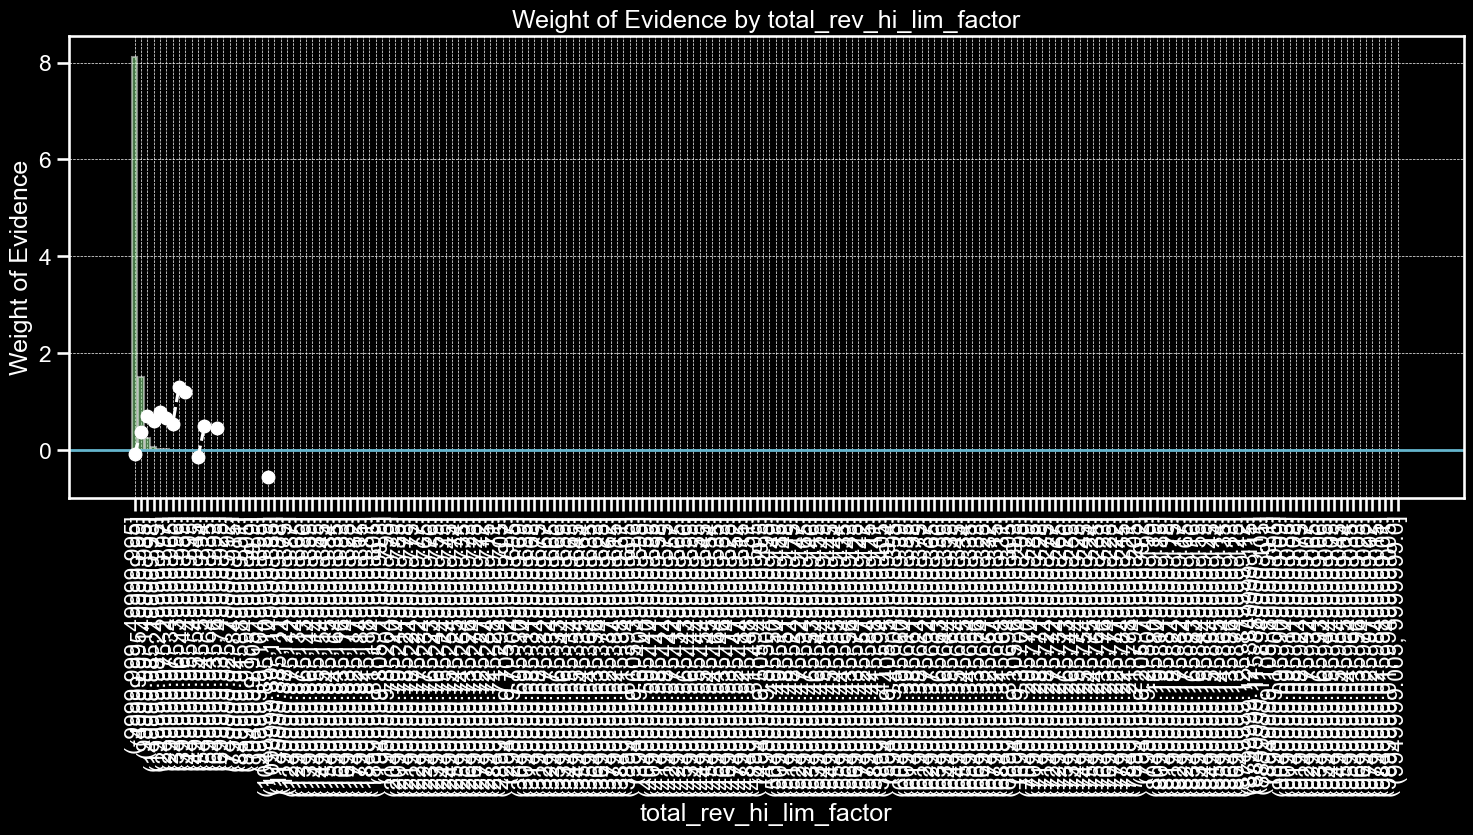

In [393]:
plot_by_woe(df_temp, 90)

In [394]:
dummies['total_rev_hi_lim:<=50k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 50000), 1, 0)
dummies['total_rev_hi_lim:50k-200k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 50000) & (df_inputs_prepr['total_rev_hi_lim'] <= 200000), 1, 0)
dummies['total_rev_hi_lim:>200k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 200000), 1, 0)

ref_categorie.append('total_rev_hi_lim:>200k')


V: acc_now_delinq 

In [395]:
df_inputs_prepr['acc_now_delinq'].describe()

count   452134.000000
mean         0.003977
std          0.068230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: acc_now_delinq, dtype: float64

In [396]:
df_inputs_prepr['acc_now_delinq'].notnull().value_counts()

acc_now_delinq
True    452134
Name: count, dtype: int64

In [397]:
df_inputs_prepr['acc_now_delinq_factor'] = pd.cut(df_inputs_prepr['acc_now_delinq'], 200)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


In [398]:
st(df_temp.iloc[ :10, :])

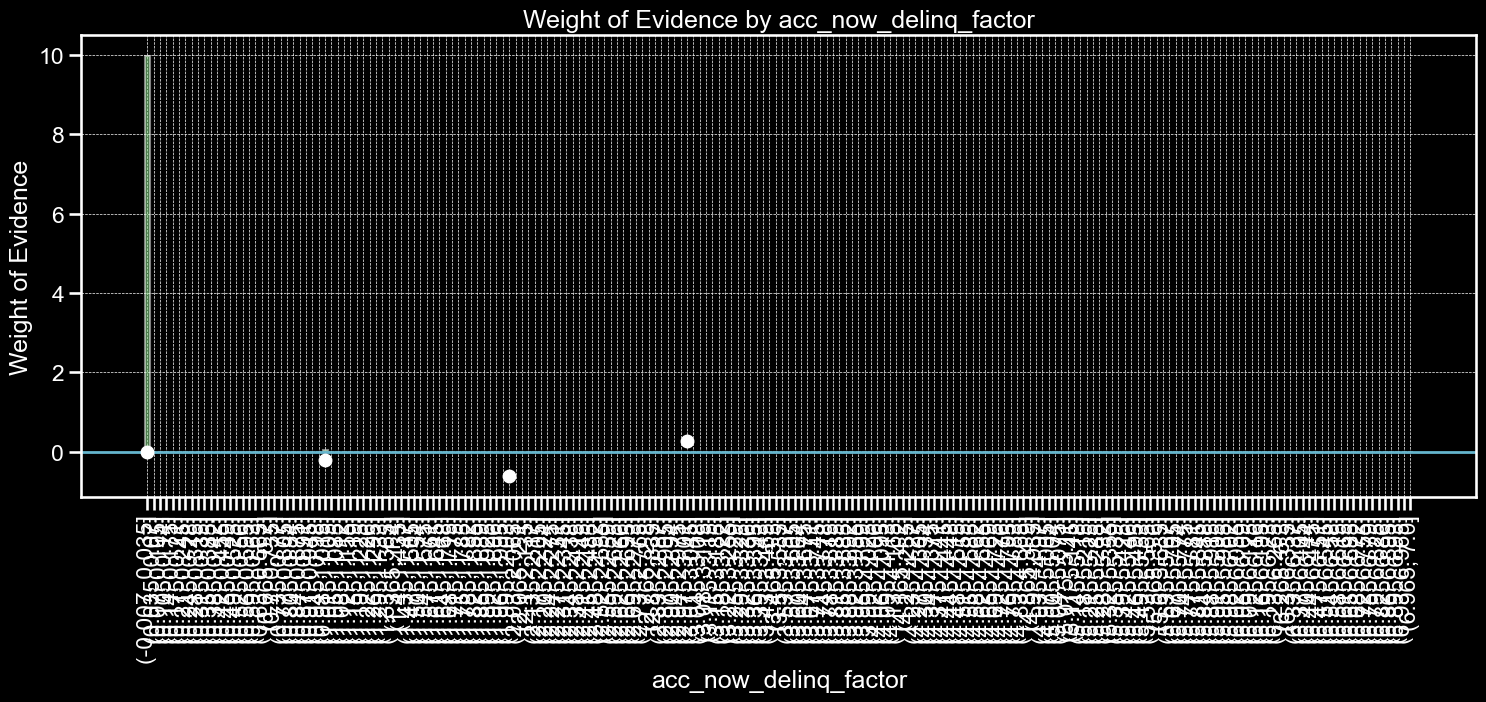

In [399]:
plot_by_woe(df_temp, 90)

In [400]:
dummies['acc_now_delinq:<=0.07'] = np.where((df_inputs_prepr['acc_now_delinq'] <= 0.07), 1, 0)
dummies['acc_now_delinq:>0.07'] = np.where((df_inputs_prepr['acc_now_delinq'] > 0.07), 1, 0)

ref_categorie.append('acc_now_delinq:>0.07')

V: mths_since_last_record

In [401]:
df_inputs_prepr['mths_since_last_record'].describe()

count   72335.000000
mean       72.353950
std        26.425898
min         0.000000
25%        55.000000
50%        74.000000
75%        92.000000
max       125.000000
Name: mths_since_last_record, dtype: float64

In [402]:
df_inputs_prepr['mths_since_last_record'].isnull().value_counts()

mths_since_last_record
True     379799
False     72335
Name: count, dtype: int64

In [403]:
df_inputs_prepr['mths_since_last_record'].fillna(0, inplace=True)

In [404]:
df_inputs_prepr['mths_since_last_record'].isnull().value_counts()

mths_since_last_record
False    452134
Name: count, dtype: int64

In [405]:
df_inputs_prepr['mths_since_last_record'].isin([0]).sum()

380054

In [406]:
df_inputs_prepr['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr['mths_since_last_record'], 200)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_last_record_factor', df_targets_prepr)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11408\4016340049.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()],


In [407]:
st(df_temp.iloc[:20, :])

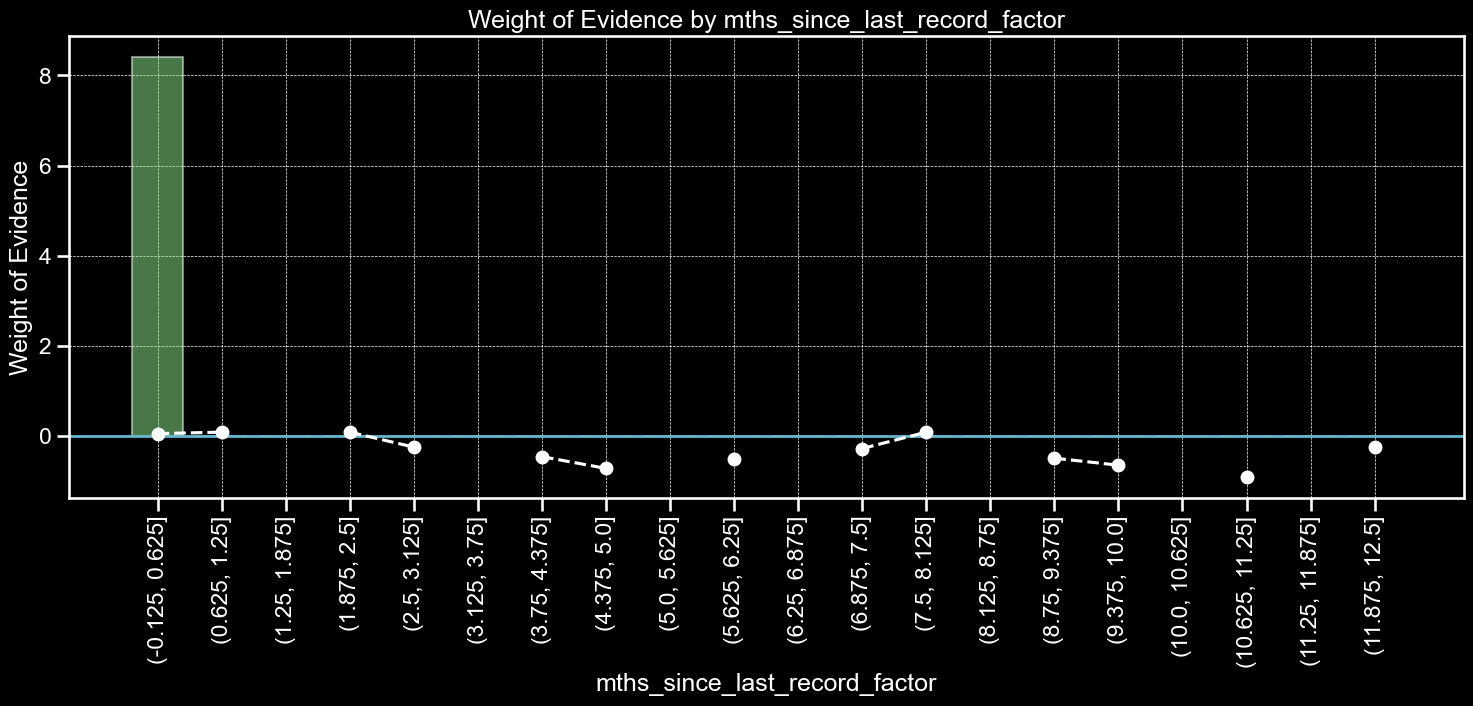

In [408]:
plot_by_woe(df_temp.iloc[:20, :], 90)

In [409]:
dummies['mths_since_last_record:<=0.645'] = np.where((df_inputs_prepr['mths_since_last_record'] <= 0.645), 1, 0)
dummies['mths_since_last_record:>0.645'] = np.where((df_inputs_prepr['mths_since_last_record'] > 0.645), 1, 0)

ref_categorie.append('mths_since_last_record:>0.645')

In [410]:
dummies.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:ONE_ATHER_ANY', 'home_ownership:RENT',
       'home_ownership:OWN',
       ...
       'total_acc:35-56', 'total_acc:56-84', 'total_acc:>84',
       'total_rev_hi_lim:<=50k', 'total_rev_hi_lim:50k-200k',
       'total_rev_hi_lim:>200k', 'acc_now_delinq:<=0.07',
       'acc_now_delinq:>0.07', 'mths_since_last_record:<=0.645',
       'mths_since_last_record:>0.645'],
      dtype='object', length=132)

In [411]:
ref_categorie

['grade:G',
 'home_ownership:ONE_ATHER_ANY',
 'addr_state:IA',
 'verification_status:Verified',
 'purpose:educational__small_business__renewable_energy__moving',
 'initial_list_status:f',
 'term_int:60',
 'emp_length_int:0',
 'mths_since_issue_date:>136',
 'int_rate:>22.772',
 'mths_since_earliest_cr_line:>538',
 'annual_inc:185k-200k',
 'mths_since_last_delinq:Missing',
 'dti:>52',
 'delinq_2yrs:>3.36',
 'inq_last_6mths:>5.28',
 'open_acc:>32',
 'pub_rec:>2',
 'total_acc:>84',
 'total_rev_hi_lim:>200k',
 'acc_now_delinq:>0.07',
 'mths_since_last_record:>0.645']

# Preprocessing the Test Dataset

In [412]:
# loan_data_inputs_train = dummies.copy()
loan_data_inputs_test = dummies.copy()

In [413]:
# loan_data_inputs_train.shape
loan_data_inputs_test.shape

(452134, 132)

In [414]:
df_targets_prepr.shape

(452134,)

In [415]:
len(ref_categorie)

22

# Export the data, to .csv

Train data

In [416]:
# loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
# df_targets_prepr.to_csv('loan_data_targets_train.csv')
# pd.DataFrame(ref_categorie).to_csv('ref_categorie.csv')

Test data

In [417]:
# loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
# df_targets_prepr.to_csv('loan_data_targets_test.csv')

# For LGD and EAD models

In [418]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'emp_length_int', 'earliest_cr_line_date',
       'mths_since_earliest_cr_line', 'term_int', 'issue_date',
       'mths_since_issue_date', 'good_bad'],
      dtype='object', length=152)

In [419]:
loan_data_2007_2014_for_LGD_EAD = loan_data

loan_data_2007_2014_for_LGD_EAD = pd.concat([loan_data_2007_2014_for_LGD_EAD, pd.get_dummies(loan_data['grade'], prefix='grade', prefix_sep=':', dtype='int')], axis=1)
loan_data_2007_2014_for_LGD_EAD = pd.concat([loan_data_2007_2014_for_LGD_EAD, pd.get_dummies(loan_data['home_ownership'], prefix='home_ownership', prefix_sep=':', dtype='int')], axis=1)
loan_data_2007_2014_for_LGD_EAD = pd.concat([loan_data_2007_2014_for_LGD_EAD, pd.get_dummies(loan_data['verification_status'], prefix='verification_status', prefix_sep=':', dtype='int')], axis=1)
loan_data_2007_2014_for_LGD_EAD = pd.concat([loan_data_2007_2014_for_LGD_EAD, pd.get_dummies(loan_data['purpose'], prefix='purpose', prefix_sep=':', dtype='int')], axis=1)
loan_data_2007_2014_for_LGD_EAD = pd.concat([loan_data_2007_2014_for_LGD_EAD, pd.get_dummies(loan_data['initial_list_status'], prefix='initial_list_status', prefix_sep=':', dtype='int')], axis=1)

In [420]:
loan_data_2007_2014_for_LGD_EAD.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy', 'purpose:small_business',
       'purpose:vacation', 'purpose:wedding', 'initial_list_status:f',
       'initial_list_status:w'],
      dtype='object', length=184)

Export the data, for LGD and EAD models

In [421]:
# loan_data_2007_2014_for_LGD_EAD.to_csv('loan_data_2007_2014_for_LGD_EAD.csv')